# Contexto
Como parte del cuadro técnico y dirección deportiva de un equipo de baloncesto español, se nos encarga el scouting de la G-League. Como sabéis en los equipos de baloncesto resulta cada vez más importante ensamblar correctamente las piezas. Esto implica establecer perfiles de jugadores para poder disponer de una plantilla equilibrada y versátil, más allá de las posiciones.
Disponemos de datos de la G-League, de fase regular, desde la temporada 16-17 hasta la actual, salvo las temporadas afectadas por el COVID, que será excluidas por ser algo irregulares. Los datos han sido extraídos de la web: https://www.basketball-reference.com/gleague/years/gleague_2024_per_game.html

# TAREAS

## Tarea 1:
 Utiliza alguna técnica de clustering para identificar perfiles de jugadores en base a los datos disponibles, centrado sobre el estilo de juego, más allá de la posición. Una vez definidos los clústeres o grupos analiza el tipo de jugador que se perfila en cada uno de ellos en base a los atributos característicos de cada grupo. Utiliza para ello todos los datos salvo los de la temporada 23-24

- Preprocesado de información (incluyendo, análisis exploratorio de los datos, identificación de tipos de datos, manejo de valores nulos, etc.).
- Selección de variables para el problema.
- Aplicación de técnicas de clustering siguiendo las buenas prácticas vistas en clase.
- Estudio de los diferentes grupos obtenidos derivados del proceso de clustering desde un punto de vista baloncestístico.
- Asignación de etiqueta a cada uno de los grupos obtenidos a partir del proceso de clustering.

In [51]:
# En este código iremos importando las librerias necesarias
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#Scipy: Librería con implementación de algoritmos para python de código abierto.
from scipy.cluster.hierarchy import dendrogram, linkage, cut_tree
from scipy.stats import pearsonr
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import KNNImputer
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

#Seaborn: Librería de visualización.
import seaborn as sns
#Warnings: Supresión de información de warnings por pantalla (prescindible, se utiliza para evitar una salida muy extensa).
import warnings
warnings.filterwarnings('ignore')





In [52]:
# Importación de los ficheros y generacion del data frame del que partiremos en nuestro análisis
df1617 = pd.read_csv('G-League_16-17.csv')
df1718 = pd.read_csv('G-League_17-18.csv')
df1819 = pd.read_csv('G-League_18-19.csv')
df2122 = pd.read_csv('G-League_21-22.csv')
df2223 = pd.read_csv('G-League_22-23.csv')
frames = [df1617, df1718, df1819, df2122, df2223]
datosJugadores = pd.concat(frames, ignore_index=True)


Previsualizamos nuestro set de datos 

En una primera observación observamos cual es la dimensión de nuestro dataset y también vemos que tenemos diferentes tipos de variables

In [53]:
datosJugadores.shape


(2994, 28)

In [54]:
datosJugadores.dtypes


Player     object
Tm         object
Age       float64
G           int64
GS          int64
MP        float64
FG        float64
FGA       float64
FG%       float64
3P        float64
3PA       float64
3P%       float64
2P        float64
2PA       float64
2P%       float64
eFG%      float64
FT        float64
FTA       float64
FT%       float64
ORB       float64
DRB       float64
TRB       float64
AST       float64
STL       float64
BLK       float64
TOV       float64
PF        float64
PTS       float64
dtype: object

Hacemos una descripción estadística de las variables que disponemos en el dataset. Aqui ya podemos ver que vamos a tener variables en diferentes escalas

In [55]:
datosJugadores.describe()
#datosJugadores.describe(include='object')



Age            G           GS           MP           FG  \
count  2467.000000  2994.000000  2994.000000  2994.000000  2994.000000   
mean     24.565464    20.844689    10.544756    23.121543     3.993253   
std       2.815363    14.318169    11.768432     8.774342     2.340482   
min      18.000000     1.000000     0.000000     0.000000     0.000000   
25%      23.000000     8.000000     1.000000    16.925000     2.100000   
50%      24.000000    20.000000     6.000000    24.200000     3.800000   
75%      26.000000    31.000000    18.000000    30.200000     5.700000   
max      39.000000    51.000000    50.000000    44.000000    12.800000   

               FGA          FG%           3P          3PA          3P%  ...  \
count  2994.000000  2970.000000  2994.000000  2994.000000  2787.000000  ...   
mean      8.732365     0.445359     1.090548     3.180628     0.310501  ...   
std       4.723811     0.112590     0.977297     2.461880     0.140432  ...   
min       0.000000     0.000000     0.000000     0.000000     0.000000  ...   
25%       5.000000     0.400000     0.300000     1.200000     0.255000  ...   
50%       8.400000     0.447000     0.900000     2.900000     0.333000  ...   
75%      12.100000     0.500000     1.700000     4.800000     0.384000  ...   
max      27.000000     1.000000     7.000000    21.000000     1.000000  ...   

               FT%          ORB          DRB          TRB          AST  \
count  2816.000000  2994.000000  2994.000000  2994.000000  2994.000000   
mean      0.727873     1.122278     3.293955     4.414562     2.186874   
std       0.169420     0.990885     1.912229     2.649863     1.837635   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.660000     0.400000     1.900000     2.500000     0.900000   
50%       0.750000     0.800000     3.100000     4.000000     1.700000   
75%       0.826000     1.500000     4.400000     5.875000     3.000000   
max       1.000000     8.000000    13.000000    17.000000    12.500000   

               STL          BLK          TOV           PF          PTS  
count  2994.000000  2994.000000  2994.000000  2994.000000  2994.000000  
mean      0.831029     0.487275     1.555478     2.039245    10.836406  
std       0.551027     0.553929     0.947728     0.850239     6.399225  
min       0.000000     0.000000     0.000000     0.000000     0.000000  
25%       0.500000     0.100000     0.900000     1.500000     5.700000  
50%       0.800000     0.300000     1.400000     2.000000    10.300000  
75%       1.100000     0.700000     2.100000     2.600000    15.400000  
max       4.000000     5.000000     7.000000     6.000000    41.300000  

[8 rows x 26 columns]

Evaluamos cuantos valores nulos tenemos en total, y cuantos tenemos en cada parámetro

In [56]:
#Número total de nulos
datosJugadores.isnull().sum().sum()

1003

In [57]:
datosJugadores.isnull().sum()

Player      0
Tm          0
Age       527
G           0
GS          0
MP          0
FG          0
FGA         0
FG%        24
3P          0
3PA         0
3P%       207
2P          0
2PA         0
2P%        43
eFG%       24
FT          0
FTA         0
FT%       178
ORB         0
DRB         0
TRB         0
AST         0
STL         0
BLK         0
TOV         0
PF          0
PTS         0
dtype: int64

Nos encontramos con algunas variables que tienen valores nulos. Si nos fijamos, salvo la edad, se trata de variables que son un cociente. Tal como sospechaba los valores que son NaN es porque al calcularlo, el denominador es 0. Se trata del porcentaje de tiros de 2, el porcentaje de tiros libres, el porcentaje de triples y el Effective Field Goal. 
Voy a hacer un tratamiento de cada una de estas variables por separado.

En el caso del porcentaje de tiros de 3, el porcentaje de tiros de 2 y el porcentaje de tiros libres reemplazare el NaN por cero, ya que son jugadores que no han efectuado tiros de 3, de 2 o libres. Puede ser interesante mantenerlos para generar el modelo predictivo.

En el caso del eFG y FG%, son jugadores que ni han tirado de 2 ni han tirado de 3. Le daremos un tratamiento diferente. Tras ver las caracteristicas de estos jugadores, vemos que son jugadores que han jugado muy poco (una media de 1.54 partidos) y una media de 2 minutos jugados por partido. Es decir son jugadores testimoniales en la liga. Se decide que es mejor eliminar esos registros del data frame.

En cuanto a la edad, vemos que son un considerable numero de registros en los que la edad aparece como nula. Son 527 registros. Si nos fijamos en la distribución de la edad, la media y la mediana están muy proximas (24.56 y 24). Los percentiles 25 y 75 no están alejados de estos valores. Basandome en estás premisas una buena opción para reemplazar los valores nulos de la edad será sustituirlo por la media, ya que esto no nos cambiará la distribución.

In [58]:
datosJugadores[datosJugadores['FG%'].isnull()]
datosJugadores[datosJugadores['eFG%'].isnull()].describe()

Age          G    GS         MP    FG   FGA  FG%    3P   3PA  \
count  10.000000  24.000000  24.0  24.000000  24.0  24.0  0.0  24.0  24.0   
mean   25.700000   1.541667   0.0   2.033333   0.0   0.0  NaN   0.0   0.0   
std     2.496664   0.721060   0.0   1.563070   0.0   0.0  NaN   0.0   0.0   
min    22.000000   1.000000   0.0   0.000000   0.0   0.0  NaN   0.0   0.0   
25%    24.250000   1.000000   0.0   1.000000   0.0   0.0  NaN   0.0   0.0   
50%    25.000000   1.000000   0.0   2.000000   0.0   0.0  NaN   0.0   0.0   
75%    26.750000   2.000000   0.0   3.000000   0.0   0.0  NaN   0.0   0.0   
max    31.000000   3.000000   0.0   6.000000   0.0   0.0  NaN   0.0   0.0   

       3P%  ...       FT%        ORB        DRB        TRB        AST  \
count  0.0  ...  2.000000  24.000000  24.000000  24.000000  24.000000   
mean   NaN  ...  0.750000   0.020833   0.137500   0.158333   0.104167   
std    NaN  ...  0.353553   0.102062   0.369268   0.375229   0.416485   
min    NaN  ...  0.500000   0.000000   0.000000   0.000000   0.000000   
25%    NaN  ...  0.625000   0.000000   0.000000   0.000000   0.000000   
50%    NaN  ...  0.750000   0.000000   0.000000   0.000000   0.000000   
75%    NaN  ...  0.875000   0.000000   0.000000   0.000000   0.000000   
max    NaN  ...  1.000000   0.500000   1.500000   1.500000   2.000000   

             STL        BLK        TOV         PF        PTS  
count  24.000000  24.000000  24.000000  24.000000  24.000000  
mean    0.041667   0.083333   0.254167   0.458333   0.062500  
std     0.141165   0.282330   0.410704   0.676896   0.224214  
min     0.000000   0.000000   0.000000   0.000000   0.000000  
25%     0.000000   0.000000   0.000000   0.000000   0.000000  
50%     0.000000   0.000000   0.000000   0.000000   0.000000  
75%     0.000000   0.000000   0.350000   0.775000   0.000000  
max     0.500000   1.000000   1.000000   2.500000   1.000000  

[8 rows x 26 columns]

Visualizamos la distribución de la variable Edad para ver que forma tienen nuestros datos antes y despues de la imputación

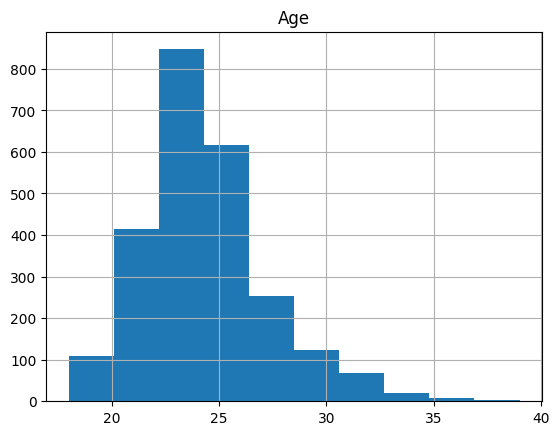

In [59]:
hist = datosJugadores.hist(column="Age", bins=10)

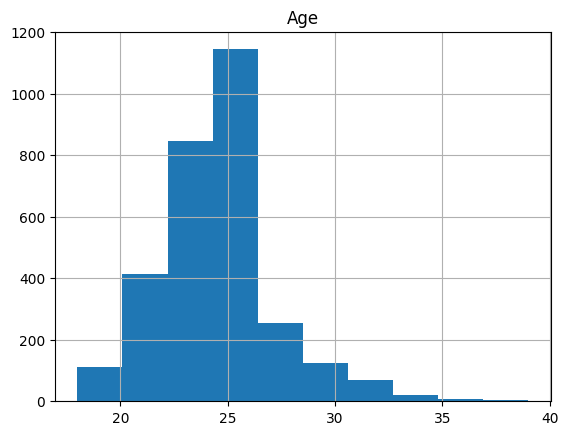

In [60]:
datosJugadores['3P%']=datosJugadores['3P%'].fillna(0, inplace=False)
datosJugadores['2P%']=datosJugadores['2P%'].fillna(0, inplace=False)
datosJugadores['FT%']=datosJugadores['FT%'].fillna(0, inplace=False)
datosJugadores['Age']=datosJugadores['Age'].fillna(datosJugadores['Age'].mean(), inplace=False)
hist = datosJugadores.hist(column="Age", bins=10)


In [61]:
datosJugadores = datosJugadores[datosJugadores['eFG%'].notnull()]
datosJugadores.reset_index(inplace=True)

Ya tenemos un dataset limpio sin datos nulos

In [62]:
datosJugadores.isnull().sum()

index     0
Player    0
Tm        0
Age       0
G         0
GS        0
MP        0
FG        0
FGA       0
FG%       0
3P        0
3PA       0
3P%       0
2P        0
2PA       0
2P%       0
eFG%      0
FT        0
FTA       0
FT%       0
ORB       0
DRB       0
TRB       0
AST       0
STL       0
BLK       0
TOV       0
PF        0
PTS       0
dtype: int64

Habra que clasificar bien el tipo de variable ya que aparecen algunos parametros que se deberian considerar como enteros, y al leer e importar los datos, se hace como decimal.

In [63]:
variablesCambiarTipo = ['Age','G','GS']
#datosJugadoresClean['Age']=datosJugadoresClean['Age'].astype('int')
datosJugadores[variablesCambiarTipo] = datosJugadores[variablesCambiarTipo].apply(lambda x: x.astype('int'))
#datosJugadores[variablesCambiarTipo] = datosJugadores[variablesCambiarTipo].astype('int')


Ya tenemos un dataset de datos en los que no tenemos valores nulos. Ahora seguiremos el preprocesado de los datos, seleccionando las variables  de interes con las que vamos a trabajar.

En nuestros datos tenemos varias variables que estan totalmente relacionadas entre si y que seria redundante cogerlas todas. Por ejemplo FG, FGA y FG% estan totalmente relacionadas y correlacionadas ya que se supone que a mayor número de intentos de tiros de campos, habrá un mayor número de tiros de campos metidos, y además están relacionadas ambas con un indicador como el porcentaje de acierto. Lo mismo sucede con el tiro de 2, el tiro de 3 y el tiro libre. En estos cuatro casos nos quedaremos con la variable que mide el porcentaje de acierto.

Tanto las variables partidos jugados,partidos jugados como titular y minutos jugados nos pueden ser utiles para clasificar a nuestros jugadores

En el campo de los rebotes tomaremos por separado los rebotes ofensivos y defensivos. Descartaremos el total de rebotes ya que seria redundante al ser una combinación linea de las anteriores.

El resto de variables que disponemos
- Asistencias
- Robos
- Tapones
- Perdidas
- Faltas personales
- Puntos

Las tendremos en cuenta a la hora de hacer nuestro cluster

Se descartan también tanto el nombre del jugador, como el equipo.




In [64]:

variablesUsar = ['Age','G','GS','MP','FG%','3P%','2P%','eFG%','FT%','ORB', 'DRB','AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS']
datosJugadoresParaOutliers = datosJugadores[variablesUsar].copy()

Nos falta en el preprocesado detectar anomalias en nuestros datos. Sobre el conjunto de variables de interes se ha decidido estudiar el metodo Isolation Forest. Este método es un algoritmo de detección de anomalías que se utiliza para identificar observaciones inusuales o atípicas en un conjunto de datos. La idea central detrás del método Isolation Forest es que las observaciones anómalas son más fáciles de aislar que las observaciones normales en un espacio de características multidimensionales. El algoritmo se basa en la construcción de un conjunto de árboles de decisión aleatorios, donde cada árbol divide recursivamente el espacio de características en subconjuntos más pequeños.


In [65]:
model = IsolationForest(n_estimators=100, contamination=0.05, random_state=42)
# Entrenar el modelo con los datos
model.fit(datosJugadoresParaOutliers)
# Predecir las anomalías (observaciones anómalas)
predictions = model.predict(datosJugadoresParaOutliers)
# Agregar las predicciones al DataFrame original
datosJugadoresParaOutliers['Anomaly'] = predictions
datosJugadoresParaOutliers[datosJugadoresParaOutliers['Anomaly']==-1].describe()
#datosJugadoresCleanCluster[datosJugadoresCleanCluster['Anomaly']==-1].median()


Age           G          GS          MP         FG%         3P%  \
count  149.000000  149.000000  149.000000  149.000000  149.000000  149.000000   
mean    24.422819    7.241611    5.637584   19.105369    0.374577    0.217289   
std      2.925150   13.599310   13.151002   13.845093    0.305925    0.285118   
min     19.000000    1.000000    0.000000    1.000000    0.000000    0.000000   
25%     23.000000    1.000000    0.000000    5.000000    0.000000    0.000000   
50%     24.000000    2.000000    0.000000   18.500000    0.417000    0.000000   
75%     26.000000    3.000000    1.000000   32.500000    0.622000    0.373000   
max     35.000000   50.000000   50.000000   44.000000    1.000000    1.000000   

              2P%        eFG%         FT%         ORB         DRB         AST  \
count  149.000000  149.000000  149.000000  149.000000  149.000000  149.000000   
mean     0.395255    0.419007    0.394624    1.391275    3.642953    2.094631   
std      0.353835    0.339217    0.400878    1.779080    3.500719    2.747303   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.000000    0.500000    0.000000   
50%      0.459000    0.500000    0.377000    0.500000    3.000000    1.000000   
75%      0.667000    0.682000    0.756000    2.500000    7.000000    3.000000   
max      1.000000    1.500000    1.000000    8.000000   13.000000   12.000000   

              STL         BLK         TOV          PF         PTS  Anomaly  
count  149.000000  149.000000  149.000000  149.000000  149.000000    149.0  
mean     0.728859    0.787919    1.592617    1.804027    9.826174     -1.0  
std      0.940694    1.181611    1.673324    1.448059   10.499584      0.0  
min      0.000000    0.000000    0.000000    0.000000    0.000000     -1.0  
25%      0.000000    0.000000    0.000000    0.500000    0.000000     -1.0  
50%      0.300000    0.000000    1.000000    1.700000    6.000000     -1.0  
75%      1.000000    1.100000    2.700000    3.000000   17.000000     -1.0  
max      4.000000    5.000000    7.000000    6.000000   41.300000     -1.0

Si nos fijamos en la descripción de las observaciones detectadas como anomalas, se observa qeu son jugadores que han jugado muy pocos partidos, 75% de estas observaciones han jugado menos de 3 partidos, aunque tengamos un jugador que ha jugado 50 partidos. Observamos que son jugadores que han jugado muchos minutos por partido, es decir que estuvieron pocos partidos pero si que jugaron bastante, una media de 19 minutos. En cuanto al rendimiento de juego se observa que el rendimiento ofensivo es ligeramente mas bajo que las observaciones consideradas como no anomalas. Decidiremos eliminar del estudio las observaciones que el algoritmo ha determinado como outliers

In [66]:
datosJugadoresParaOutliers[datosJugadoresParaOutliers['Anomaly']==1].describe()

Age            G           GS           MP          FG%  \
count  2821.000000  2821.000000  2821.000000  2821.000000  2821.000000   
mean     24.466147    21.727402    10.893655    23.513080     0.449097   
std       2.550484    13.933726    11.643677     8.175678     0.090309   
min      18.000000     1.000000     0.000000     2.000000     0.077000   
25%      23.000000    10.000000     1.000000    17.500000     0.401000   
50%      24.000000    21.000000     7.000000    24.400000     0.447000   
75%      25.000000    31.000000    18.000000    30.200000     0.500000   
max      39.000000    51.000000    50.000000    42.700000     0.778000   

               3P%          2P%         eFG%          FT%          ORB  \
count  2821.000000  2821.000000  2821.000000  2821.000000  2821.000000   
mean      0.295281     0.506727     0.509017     0.705207     1.117441   
std       0.144162     0.110620     0.089884     0.207605     0.928287   
min       0.000000     0.000000     0.077000     0.000000     0.000000   
25%       0.250000     0.457000     0.468000     0.643000     0.500000   
50%       0.328000     0.510000     0.515000     0.750000     0.900000   
75%       0.380000     0.568000     0.563000     0.821000     1.500000   
max       1.000000     1.000000     0.938000     1.000000     8.000000   

               DRB          AST          STL          BLK          TOV  \
count  2821.000000  2821.000000  2821.000000  2821.000000  2821.000000   
mean      3.302375     2.209465     0.843141     0.474832     1.564587   
std       1.773516     1.774446     0.519281     0.495395     0.889041   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       2.000000     0.900000     0.500000     0.100000     0.900000   
50%       3.100000     1.700000     0.800000     0.300000     1.400000   
75%       4.400000     3.000000     1.100000     0.700000     2.100000   
max      13.000000    12.500000     4.000000     3.500000     6.000000   

                PF          PTS  Anomaly  
count  2821.000000  2821.000000   2821.0  
mean      2.065119    10.981425      1.0  
std       0.792846     6.050892      0.0  
min       0.000000     0.400000      1.0  
25%       1.500000     6.100000      1.0  
50%       2.000000    10.500000      1.0  
75%       2.600000    15.400000      1.0  
max       6.000000    40.000000      1.0

In [67]:
datosJugadores['Anomaly']=datosJugadoresParaOutliers['Anomaly']
datosJugadores = datosJugadores[datosJugadores['Anomaly']==1]
datosJugadores = datosJugadores.drop('Anomaly',axis=1)

Para que la escala de nuestros datos no afecte a los resultados, deberemos de hacer algún tipo de transformación. Se decide aplicar la normalización denominada MinMaxScaler a todas las variables , menos las que se trata de porcentajes. Utilizamos esta normalización con el objetivo que todos nuestros datos queden entre 0 y 1. La manera de hacerlo es la siguiente

1. Identifica el valor mínimo (min) y el valor máximo (max) de cada característica.
2. Escala cada valor de la característica usando la fórmula:


$$ \text{Valor escalado} = \frac{\text{Valor original} - \text{Valor mínimo}}{\text{Valor máximo} - \text{Valor mínimo}} $$


Esto garantiza que todos los valores estén en la misma escala y puedan compararse de manera equitativa. MinMaxScaler es útil cuando las características de los datos están en diferentes escalas, ayudando a evitar que las características con valores más grandes dominen el análisis.

In [68]:
variablesNormalizar = ['Age','G','GS','MP','ORB', 'DRB','AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS']
#variablesNormalizar = ['Age','G','GS','MP','ORB', 'DRB','AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS']
#Definición del objeto de scalado.
#scal_age = MinMaxScaler()
#Aprendizaje sobre los datos
#scal_age.fit(datosJugadores[variablesNormalizar])
#Aplicación sobre la columna e incorporación al dataframe de pandas.
#datosJugadores[variablesNormalizar]=scal_age.transform(datosJugadoresCleanCluster[variablesNormalizar])


# Definir el objeto de MinMaxScaler para la normalización
scaler = MinMaxScaler()

for var in variablesNormalizar:
    new_column_name = var + '_scal'
    datosJugadores[new_column_name] = scaler.fit_transform(datosJugadores[[var]])

datosJugadores.columns

Index(['index', 'Player', 'Tm', 'Age', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%',
       '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%',
       'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS',
       'Age_scal', 'G_scal', 'GS_scal', 'MP_scal', 'ORB_scal', 'DRB_scal',
       'AST_scal', 'STL_scal', 'BLK_scal', 'TOV_scal', 'PF_scal', 'PTS_scal'],
      dtype='object')

Decido no tener en cuenta el porcentaje de FG porque al incluir 2p y 3p ya tengo la informacion básica con la que se calcula el indicador, y me parece tener interesante ambos indicadores por separado. Si que mantengo el eFG donde se pondera el triple.

In [69]:
variablesCluster = [col for col in datosJugadores.columns if col.endswith('_scal') or col.endswith('%')]
#variablesCluster = [col for col in datosJugadores.columns if col.endswith('_scal') or col.endswith('eFG%')]
variablesCluster = [var for var in variablesCluster if var != 'FG%']
variablesClusterSinVariablesTemporales = [var for var in variablesCluster if 'G_scal' not in var and 'GS_scal' not in var and 'MP_scal' not in var] 



Vamos a evaluar dos estrategias de clustering k-means, una primera utilizando todos los parametros disponibles y una segunda en la que no vamos a tener en cuenta ni los minutos jugados, ni el número de partidos jugados en la G-league ni la titularidad

## K means con todas las variables

In [70]:
def elbow(data, kmin, kmax):
  inertias = []
  for i in range(kmin, kmax):
      kmeans = KMeans(n_clusters=i, random_state=7)
      kmeans.fit(data)
      inertias.append(kmeans.inertia_)

  plt.plot(range(kmin, kmax), inertias, marker='o')
  plt.title('Elbow method')
  plt.xlabel('Number of clusters')
  plt.ylabel('Inertia')
  plt.show()


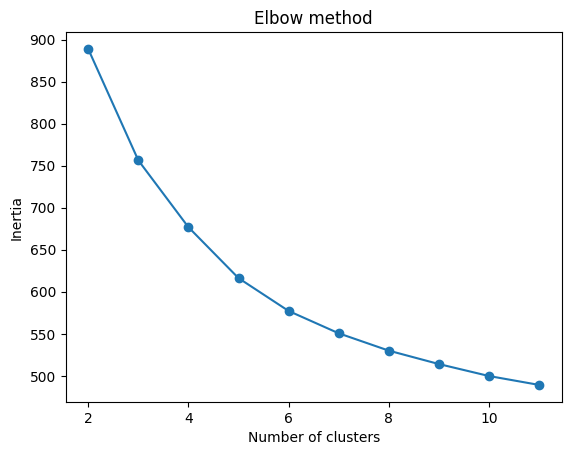

In [71]:

elbow(datosJugadores[variablesCluster], 2, 12)

El método del codo nos indica que 5-6 clusters es la cantidad óptima de número de clusters

In [72]:
k=6
#Se define el modelo.
kmeans = KMeans(n_clusters=k, random_state=7)
#Se "entrena" el modelo y se lanza la predicción.
kmeans.fit_predict(datosJugadores[variablesCluster].values)
#Se obtienen las etiquetas o clúster asignado a cada observación.
datosJugadores['cluster_kmeans']=kmeans.labels_
y_clusters=kmeans.labels_

Text(0, 0.5, 'Frequency')

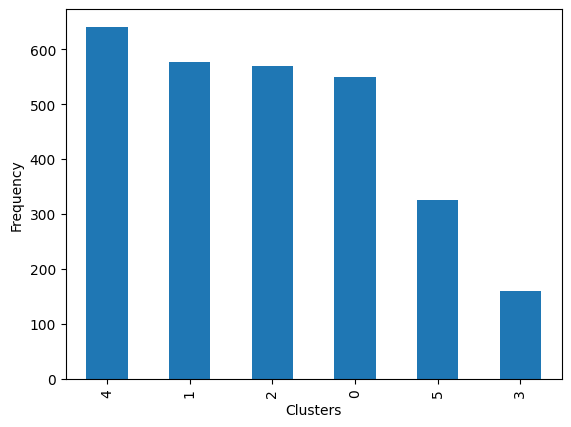

In [73]:
ax = datosJugadores['cluster_kmeans'].value_counts().plot(kind='bar')
ax.set_xlabel("Clusters")
ax.set_ylabel("Frequency")

In [74]:

variablesClusterVisualizar = [col for col in datosJugadores.columns if col in variablesNormalizar or col.endswith('%')]

aux = datosJugadores.groupby(['cluster_kmeans'])[variablesClusterVisualizar].agg(['mean', 'std', 'median'])
new_columns = []
for col in aux.columns:
    new_columns.append(f"{col[0]}_{col[1]}")  # Concatenar el nombre de la variable y la estadística

# Asignar los nuevos nombres de columna al DataFrame 'aux'
aux.columns = new_columns
aux
aux.reset_index(inplace=True)
aux.columns

Index(['cluster_kmeans', 'Age_mean', 'Age_std', 'Age_median', 'G_mean',
       'G_std', 'G_median', 'GS_mean', 'GS_std', 'GS_median', 'MP_mean',
       'MP_std', 'MP_median', 'FG%_mean', 'FG%_std', 'FG%_median', '3P%_mean',
       '3P%_std', '3P%_median', '2P%_mean', '2P%_std', '2P%_median',
       'eFG%_mean', 'eFG%_std', 'eFG%_median', 'FT%_mean', 'FT%_std',
       'FT%_median', 'ORB_mean', 'ORB_std', 'ORB_median', 'DRB_mean',
       'DRB_std', 'DRB_median', 'AST_mean', 'AST_std', 'AST_median',
       'STL_mean', 'STL_std', 'STL_median', 'BLK_mean', 'BLK_std',
       'BLK_median', 'TOV_mean', 'TOV_std', 'TOV_median', 'PF_mean', 'PF_std',
       'PF_median', 'PTS_mean', 'PTS_std', 'PTS_median'],
      dtype='object')

In [75]:
#sns.pairplot(datosJugadores, hue='cluster_kmeans', size=2, vars=variablesClusterVisualizar, kind='scatter', palette='muted')

In [76]:
# Defino una funcion para visualizar las medias y desviaciones tipicas de los diferentes parametros de interes para cada uno de los clusters que definimos.
# La usaremos varias veces debido a que generaremos varios tipos de clusters kmeans y jerarquico. Dentro de jerarquico, según varios metodos.

def visualize_cluster_means(df, cluster_column, variables_to_visualize, figsize=(16, 16), num_cols=4):
    """
    Función para visualizar las medias de variables agrupadas por clusters.

    Parameters:
        df (DataFrame): DataFrame que contiene los datos.
        cluster_column (str): Nombre de la columna que contiene la información de clustering.
        variables_to_visualize (list): Lista de nombres de las variables a visualizar.
        figsize (tuple, optional): Tamaño de la figura. Default es (16, 4).
        num_cols (int, optional): Número de columnas por fila en la disposición de subplots. Default es 4.
    """
    # Agrupar los datos por cluster y calcular las estadísticas descriptivas
    aux = df.groupby(cluster_column)[variables_to_visualize].agg(['mean', 'std'])
    aux.columns = [f"{col[0]}_{col[1]}" for col in aux.columns]  # Renombrar columnas
    
    # Convertir la columna 'cluster_column' a tipo str
    aux[cluster_column] = aux.index.astype(str)

    # Convertir los índices de 'aux' a valores numéricos para usar como 'x' en errorbar
    x_values = np.arange(len(aux))  # Crear una secuencia numérica de 0 a n-1 (n: número de clusters)

    # Configurar el número de subplots por fila y columna
    num_rows = (len(variables_to_visualize) + num_cols - 1) // num_cols  # Calcular el número necesario de filas

    # Configurar el gráfico con subplots para cada variable
    fig, axes = plt.subplots(num_rows, num_cols, figsize=figsize, sharex=True)

    # Iterar sobre cada variable y crear un gráfico individual
    for i, var in enumerate(variables_to_visualize):
        row = i // num_cols
        col = i % num_cols
        
        # Graficar las medias como barras y las desviaciones estándar como barras de error
        sns.barplot(x=cluster_column, y=f"{var}_mean", data=aux, ax=axes[row, col], palette='muted', alpha=0.7)  # Media
        axes[row, col].errorbar(x=x_values, y=aux[f"{var}_mean"], yerr=aux[f"{var}_std"], lolims=True, capsize=0, ls='None', color='k')  # Std

        # Añadir el valor de la media como texto dentro de cada barra
        for bar, value in zip(axes[row, col].patches, aux[f"{var}_mean"]):
            axes[row, col].annotate(f'{value:.2f}', 
                                    (bar.get_x() + bar.get_width() / 2, bar.get_height()*0.70), 
                                    ha='center', va='center', 
                                    fontsize=8, color='black', 
                                    xytext=(0, 5), 
                                    textcoords='offset points')

        # Configurar título y etiquetas de ejes para cada subplot
        axes[row, col].set_title(f'{var.capitalize()} by Cluster')
        axes[row, col].set_ylabel('Value')
        axes[row, col].set_xlabel('Cluster')

    # Eliminar subplots no utilizados
    for i in range(len(variables_to_visualize), num_rows * num_cols):
        row = i // num_cols
        col = i % num_cols
        fig.delaxes(axes[row, col])

    # Ajustar espaciado entre subplots y mostrar el gráfico
    plt.tight_layout()

    # Crear leyenda general para los colores (clusters)
    handles = [plt.Rectangle((0,0),1,1, color=sns.color_palette('muted', len(aux.index))[i], alpha=0.7) for i in range(len(aux.index))]
    labels = [f'Cluster {i}' for i in aux.index]

    # Crear una única leyenda fuera de los subplots
    fig.legend(handles, labels, loc='lower center', ncol=min(len(aux.index), 3))

    plt.show()

# Ejemplo de uso:
# Suponiendo que 'datosJugadores' es tu DataFrame y 'variablesClusterVisualizar' es la lista de variables a visualizar
#variablesClusterVisualizar = [...]  # Lista de variables a visualizar

# Llamar a la función para visualizar los clusters



> Tras visualizar una de las clases del master, se comentaba este paper **Torres-Ronda, Lorena PhD1; Curtis, Ryan M. PhD2. Building the Foundations for Information Communication in Sports Science and Its Use in Decision Making. Strength and Conditioning Journal 46(1):p 74-81, February 2024. | DOI: 10.1519/SSC.0000000000000811** y una de las figuras era que la visualización de datos era mejor como jitter scatter plot, que gráfico de barras que era lo que primeramente había programado. Así que finalmente dejo las dos visualizaciones.

In [77]:
def visualize_cluster_lollipop_panel(df, cluster_column, variables_to_visualize, figsize=(16, 16), num_cols=4):
    """
    Función para visualizar las medias de variables agrupadas por clusters con un lollipop jittered scatter plot en un panel.

    Parameters:
        df (DataFrame): DataFrame que contiene los datos.
        cluster_column (str): Nombre de la columna que contiene la información de clustering.
        variables_to_visualize (list): Lista de nombres de las variables a visualizar.
        figsize (tuple, optional): Tamaño de la figura. Default es (16, 16).
        num_cols (int, optional): Número de columnas en la disposición de subplots. Default es 4.
    """
    # Agrupar los datos por cluster y calcular las estadísticas descriptivas
    aux = df.groupby(cluster_column)[variables_to_visualize].agg(['mean', 'std'])
    aux.columns = [f"{col[0]}_{col[1]}" for col in aux.columns]  # Renombrar columnas

    # Convertir la columna 'cluster_column' a tipo str para usar como etiquetas en el plot
    aux[cluster_column] = aux.index.astype(str)
    
    num_vars = len(variables_to_visualize)
    num_rows = (num_vars + num_cols - 1) // num_cols

    fig, axes = plt.subplots(num_rows, num_cols, figsize=figsize)
    axes = axes.flatten()

    for i, var in enumerate(variables_to_visualize):
        ax = axes[i]
        
        # Plot lines for the average
        sns.scatterplot(x=f"{var}_mean", y=cluster_column, data=aux, marker='|', s=1000, color='k', ax=ax)
        
        # Jitter plot
        sns.stripplot(x=var, y=cluster_column, data=df, jitter=True, order=aux.index.astype(str), zorder=0, ax=ax, palette='muted', orient='h')
        
        # Añadir el valor de la media como texto cerca de cada punto
        for idx, row in aux.iterrows():
            ax.text(row[f"{var}_mean"], idx, f'{row[f"{var}_mean"]:.2f}', ha='right', va='center', fontsize=10, color='black', 
                    bbox=dict(boxstyle="round,pad=0.3", edgecolor='none', facecolor='white', alpha=0.6))

        # Title and labels
        ax.set_title(f'{var.capitalize()} by Cluster')
        ax.set_xlabel(f'{var.capitalize()}')
        ax.set_ylabel('Cluster')
    
    # Remove unused subplots
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    # Custom legend
    handles = [
        Line2D([0], [0], marker='o', color='w', label='Individual result', markerfacecolor='k', markersize=10),
        Line2D([0], [0], marker='|', color='k', label='Mean value', linestyle='None', markersize=25)
    ]
    fig.legend(handles=handles, loc='upper center', ncol=2, frameon=False, fontsize=12)
    
    # Adjust layout
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

Según el criterio k-means se observan diferencias en los perfiles de los diferentes clusters. 

**Cluster 0** Son jugadores que han participado una media de 11.75 partidos, destacando en el número medio de minutos con 30.20. Son bastante efectivos en el tiro de 3 con un 35% de media y en el tiro libre con un 79%, destacan en el rebote defensivo mas que en el ofensivo, y de todos los perfiles son los que mayor numero de asistencias media tienen con 3.58. Además en el aspecto defensivo roban 1.20 balones, aunque tambien es el perfil que mas balones pierde. Es el grupo que mas puntos anota con una media de 16.28

**Cluster 1** Jugadoes que participan una media de 34 partidos, aunque solo en 8.44 partidos juegan de titulares,tienen una optima eficiencia anotadora 51% en el tiro de 2 y 31% en el tiro de 3. En el resto de parametros tanto ofensivos como defensivos, no acaban de destacar en comparación con otros clusters, pero tampoco es un perfil de nivel bajo

**Cluster 2** Jugadores que juegan muchos partidos y aportan mucho minutos, destacan en el tiro de 2 y tiro de 3, jugadores finalizadores, son el segundo cluster en rebote ofensivo y defensivo, como en número de asistencias, robos y tambien perdidas. Seria un perfil similar al **cluster 0** pero aportando mucha mas veterania y experiencia. Serian jugadores titulares habituales en su equipo. 

**Cluster 3** Jugadores con poca experiencia en cuanto a numero de partidos pero que vienen a jugar en torno a 12 minutos de media,mas eficientes en el tiro de 2 que en el tiro de 3. Aportan muy poco en tareas de rebote, asi como en compartir el balón, jugadores de perfil bajo.

**Cluster 4** Jugadores de un perfil similar al cluster 1, pero con menos experiencia, en cuanto a número de partidos jugados como a minutos, con la diferencia que aportan lo mismo a nivel ofensivo en el tiro de 2 y tiro de 3 (apenas diferencias con el cluster 1). Son jugadores para darles mas oportunidades ya que su rendimiento con tan pocos partidos es bastante optimo si lo comparamos con jugadores con mayor experiencia.

**Cluster 5** Jugadores con muchas mas eficiencia en el tiro de 2, de hecho es el cluster con mayor media, que en el tiro de 3. Reboteadores natos, tanto ofensivamente como defensivamente, tanto el alto numero de tapones como el alto número de faltas personales, nos hace indicar que el perfil es de jugador que juega en posiciones interiores. Podría ser un claro ejemplo de pivots o ala-pivots

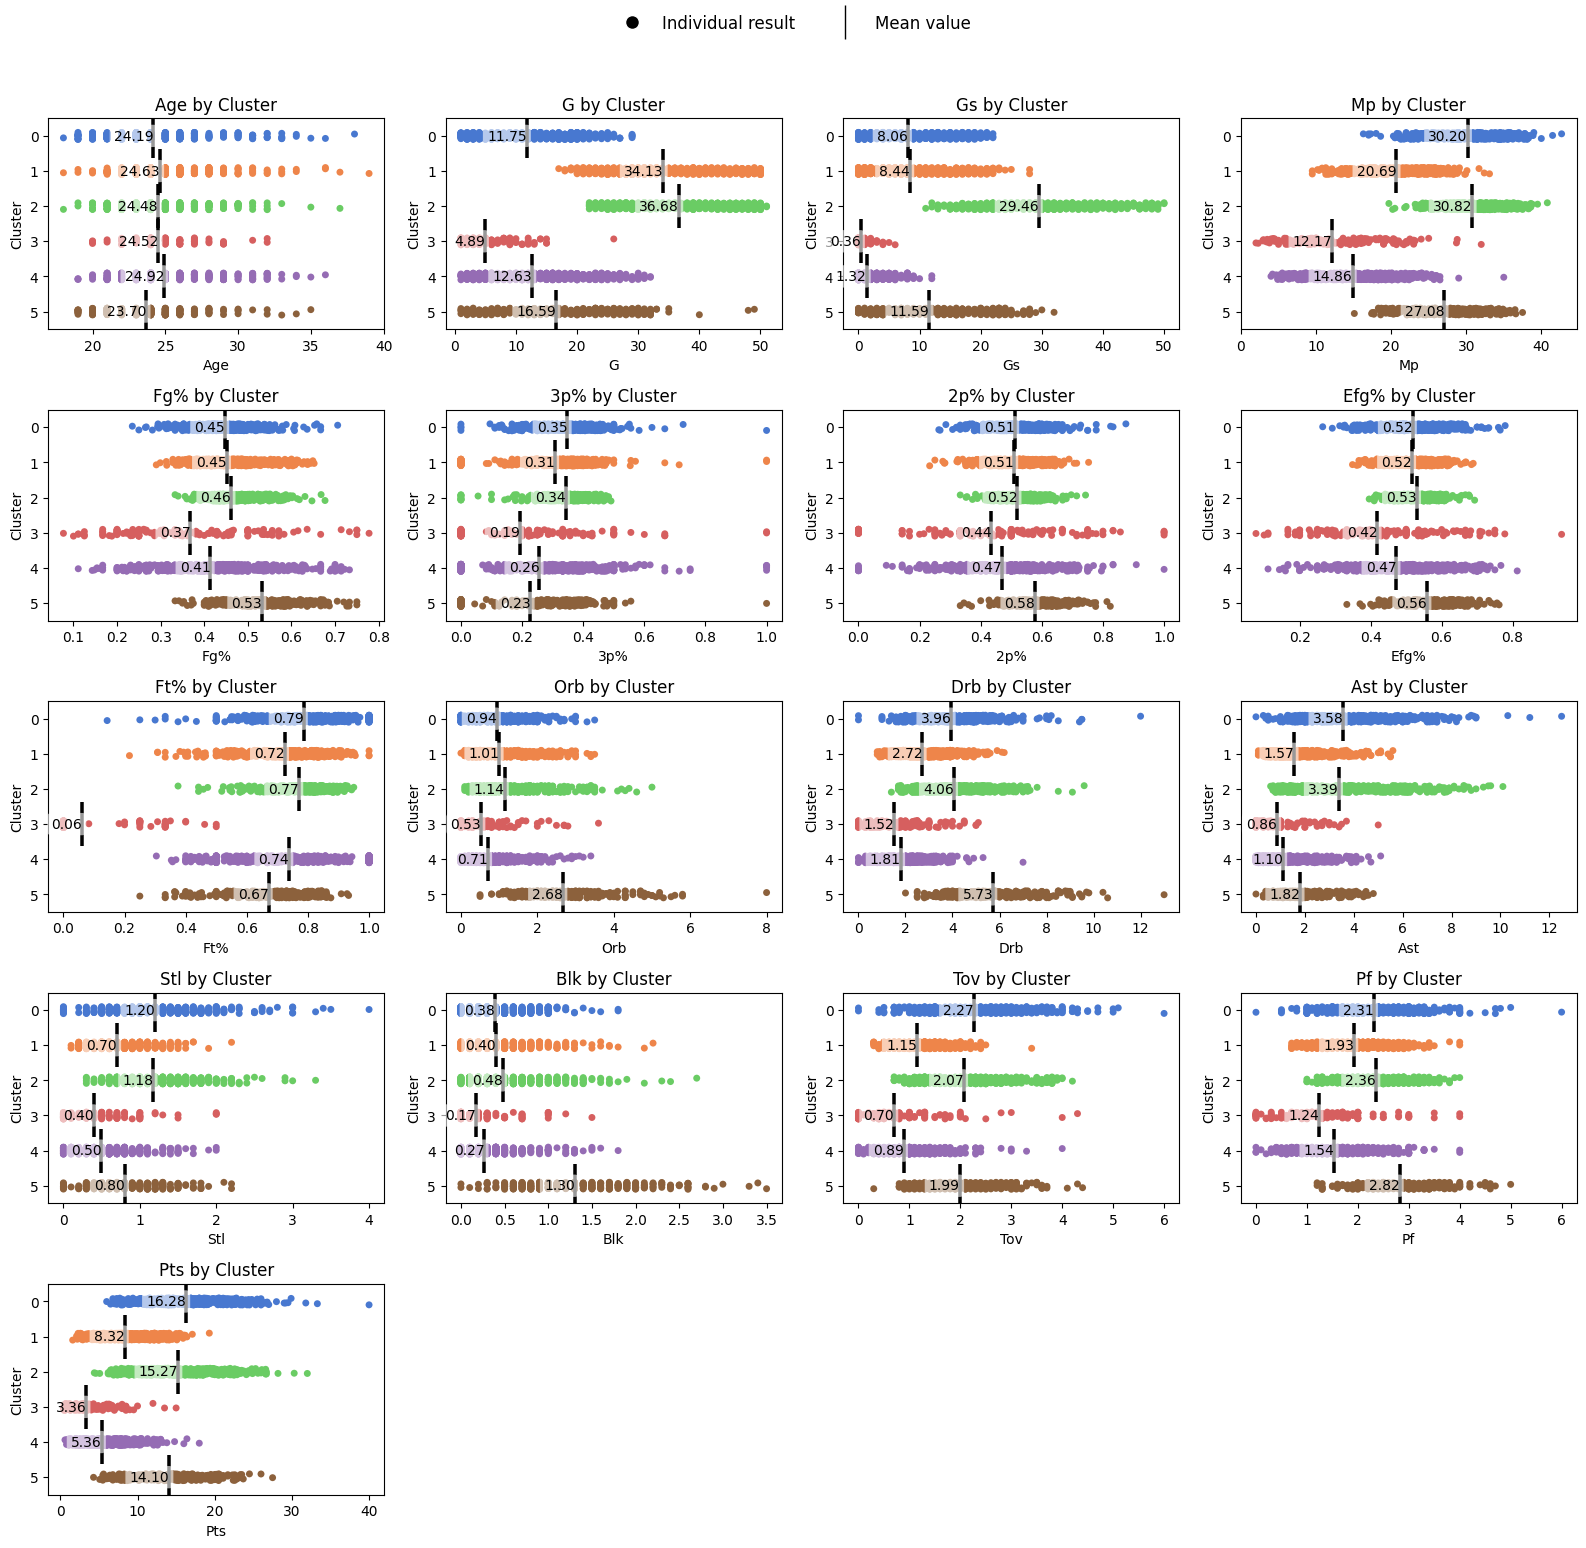

In [78]:
visualize_cluster_lollipop_panel(datosJugadores, 'cluster_kmeans', variablesClusterVisualizar)

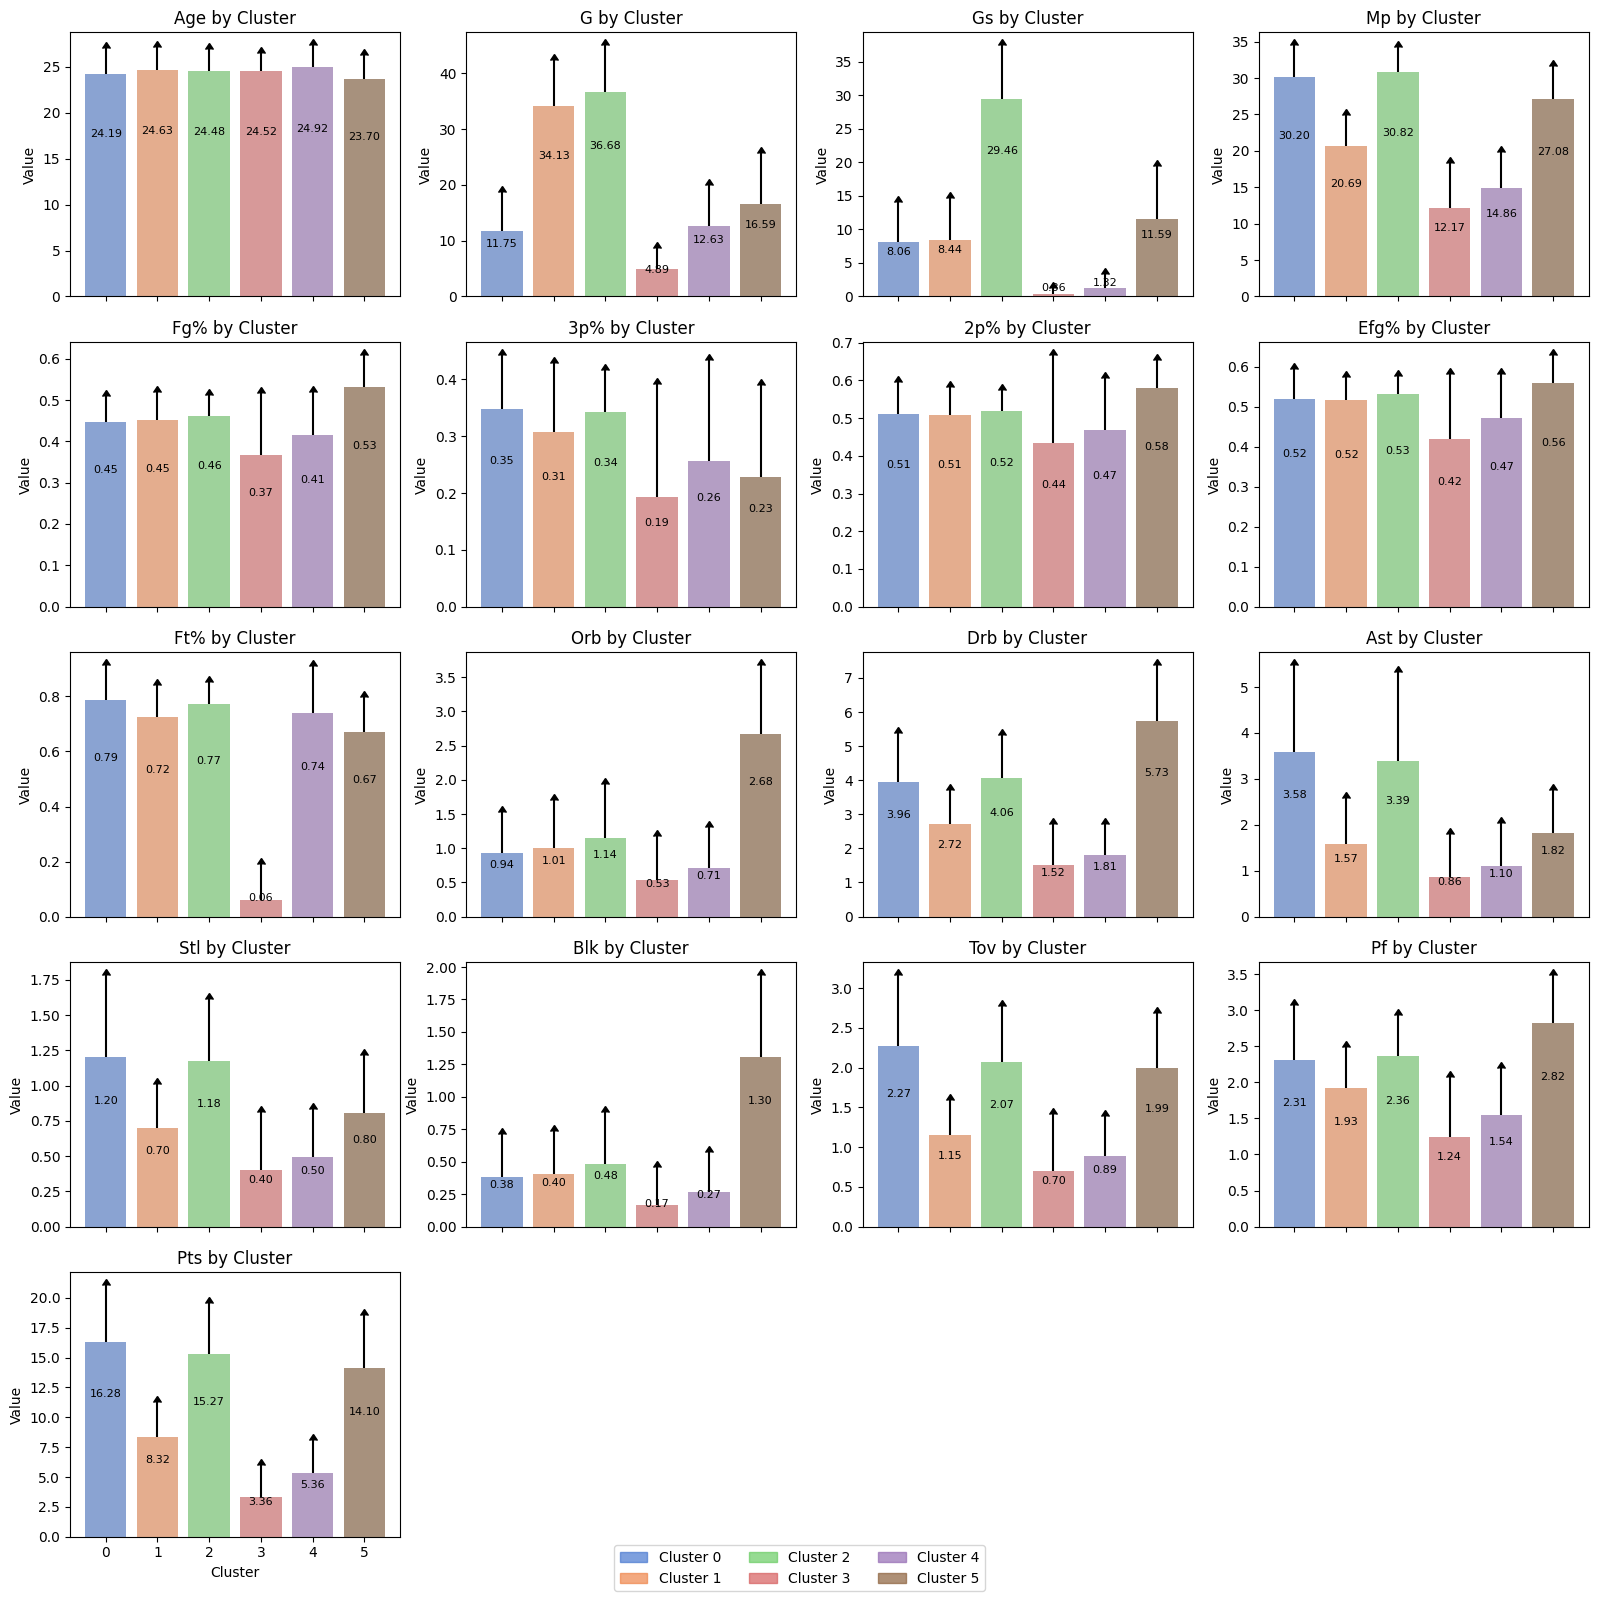

In [79]:

# Llamar a la función para visualizar los clusters
visualize_cluster_means(datosJugadores, 'cluster_kmeans', variablesClusterVisualizar)


## K means sin variables de tiempo

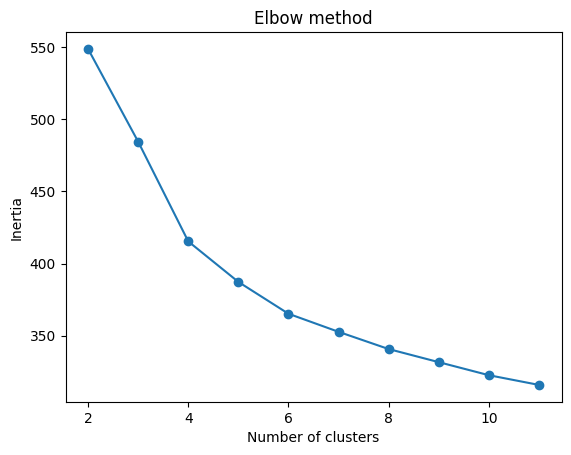

In [80]:
elbow(datosJugadores[variablesClusterSinVariablesTemporales], 2, 12)

In [81]:
k=6
#Se define el modelo.
kmeans = KMeans(n_clusters=k, random_state=7)
#Se "entrena" el modelo y se lanza la predicción.
kmeans.fit_predict(datosJugadores[variablesClusterSinVariablesTemporales].values)
#Se obtienen las etiquetas o clúster asignado a cada observación.
datosJugadores['cluster_kmeans_sin_temporales']=kmeans.labels_
y_clusters=kmeans.labels_

Text(0, 0.5, 'Frequency')

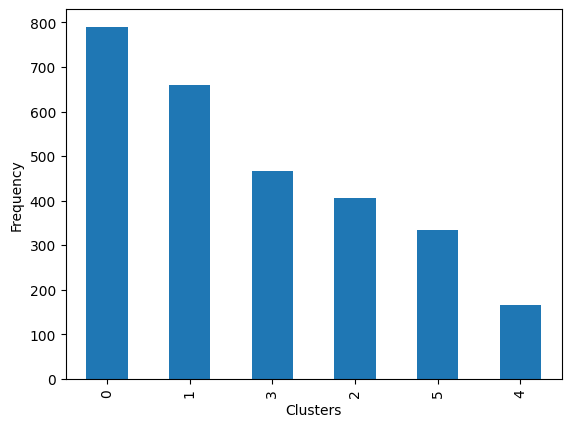

In [82]:
ax = datosJugadores['cluster_kmeans_sin_temporales'].value_counts().plot(kind='bar')
ax.set_xlabel("Clusters")
ax.set_ylabel("Frequency")

In [83]:
aux = datosJugadores.groupby(['cluster_kmeans_sin_temporales'])[variablesClusterVisualizar].agg(['mean', 'std', 'median'])
new_columns = []
for col in aux.columns:
    new_columns.append(f"{col[0]}_{col[1]}")  # Concatenar el nombre de la variable y la estadística

# Asignar los nuevos nombres de columna al DataFrame 'aux'
aux.columns = new_columns
aux
aux.reset_index(inplace=True)
aux.columns

Index(['cluster_kmeans_sin_temporales', 'Age_mean', 'Age_std', 'Age_median',
       'G_mean', 'G_std', 'G_median', 'GS_mean', 'GS_std', 'GS_median',
       'MP_mean', 'MP_std', 'MP_median', 'FG%_mean', 'FG%_std', 'FG%_median',
       '3P%_mean', '3P%_std', '3P%_median', '2P%_mean', '2P%_std',
       '2P%_median', 'eFG%_mean', 'eFG%_std', 'eFG%_median', 'FT%_mean',
       'FT%_std', 'FT%_median', 'ORB_mean', 'ORB_std', 'ORB_median',
       'DRB_mean', 'DRB_std', 'DRB_median', 'AST_mean', 'AST_std',
       'AST_median', 'STL_mean', 'STL_std', 'STL_median', 'BLK_mean',
       'BLK_std', 'BLK_median', 'TOV_mean', 'TOV_std', 'TOV_median', 'PF_mean',
       'PF_std', 'PF_median', 'PTS_mean', 'PTS_std', 'PTS_median'],
      dtype='object')

Observando la distribución de nuestros parametros en cada cluster, podemos ver ciertos patrones de jugadores. El **cluster 4** serían jugadores que no son muy eficientes en ataque ni en defensa, de todos los clusters tienen las medias mas bajas en cuanto tiro de 2, %EFG, número de rebotes tanto ofensivos como defensivos, número de asistencias. En cuanto a lo positivo son los que menos perdidas hacen. Esto nos indica que son jugadores con poca aportacion o participación en el juego. Aunque no la hayamos usado para clusterizar, podemos ver que estos jugadores juegan muy poco, una media de 5,88 partidos demedia.

El **cluster 0** y el **cluster 1** son dos perfiles de jugadores similares, los jugadores del **cluster 0** tienen ligeros mejores porcentajes de tiros de 2, de 3 y por consecuencia en eficiencia. Donde mas diferencia hay es en el esfuerzo defensivo, los jugadores del **cluster 0** doblan en numero de rebotes y robos a los del **cluster 1**. Los jugadores del **cluster 0** participan mas en la organizacion del juego, tambien tienen mayor número de perdidas y un mayor número de asistencias. 

El **cluster 2** es interesante ya que observamos que son jugadores con mayor eficiencia de tiro con una media de 56%, con mucha diferencia son los mayores reboteadores, y los que mas tapones ponen. Esto de primeras nos haría pensar que son jugadores de posiciones interiores como vimos en la primera aproximacion al cluster que hicimos. Pero vemos que son jugadores también con un porcentaje no pequeño en el triple, tienen una media del 27%. Quizá habría que profundizar en este **cluster 2** porque puede que haya una mezcla de jugadores, todos ellos haciendo cosas muy positivas en diferentes posiciones del campo.

El **cluster 3** son organizadores del juego, dan una media de 5,17 asistencias por partido, muy buenos porcentajes en el tiro de 2 (Media del 50%) y en el tiro de 3 (Media del 34%), comprometidos con el rebote defensivo y el robo, con una media de 17 puntos por partido. Serían jugones con perfiles muy interesantes para cualquier equipo.

El **cluster 5** viendo sus medias nos encajan mas en el perfil de pivot o ala-pivot que comentabamos en el **cluster 2**, jugadores comprometidos con el rebote ofensivo, con un muy buen porcentaje en el tiro de 2 (media del 55%) pero con un muy bajo porcentaje en el tiro de 3 (media del 10%). Promedian 6.49 puntos por partido. Podría ser un perfil interesante como jugador de banquillo en las posiciones interiores.

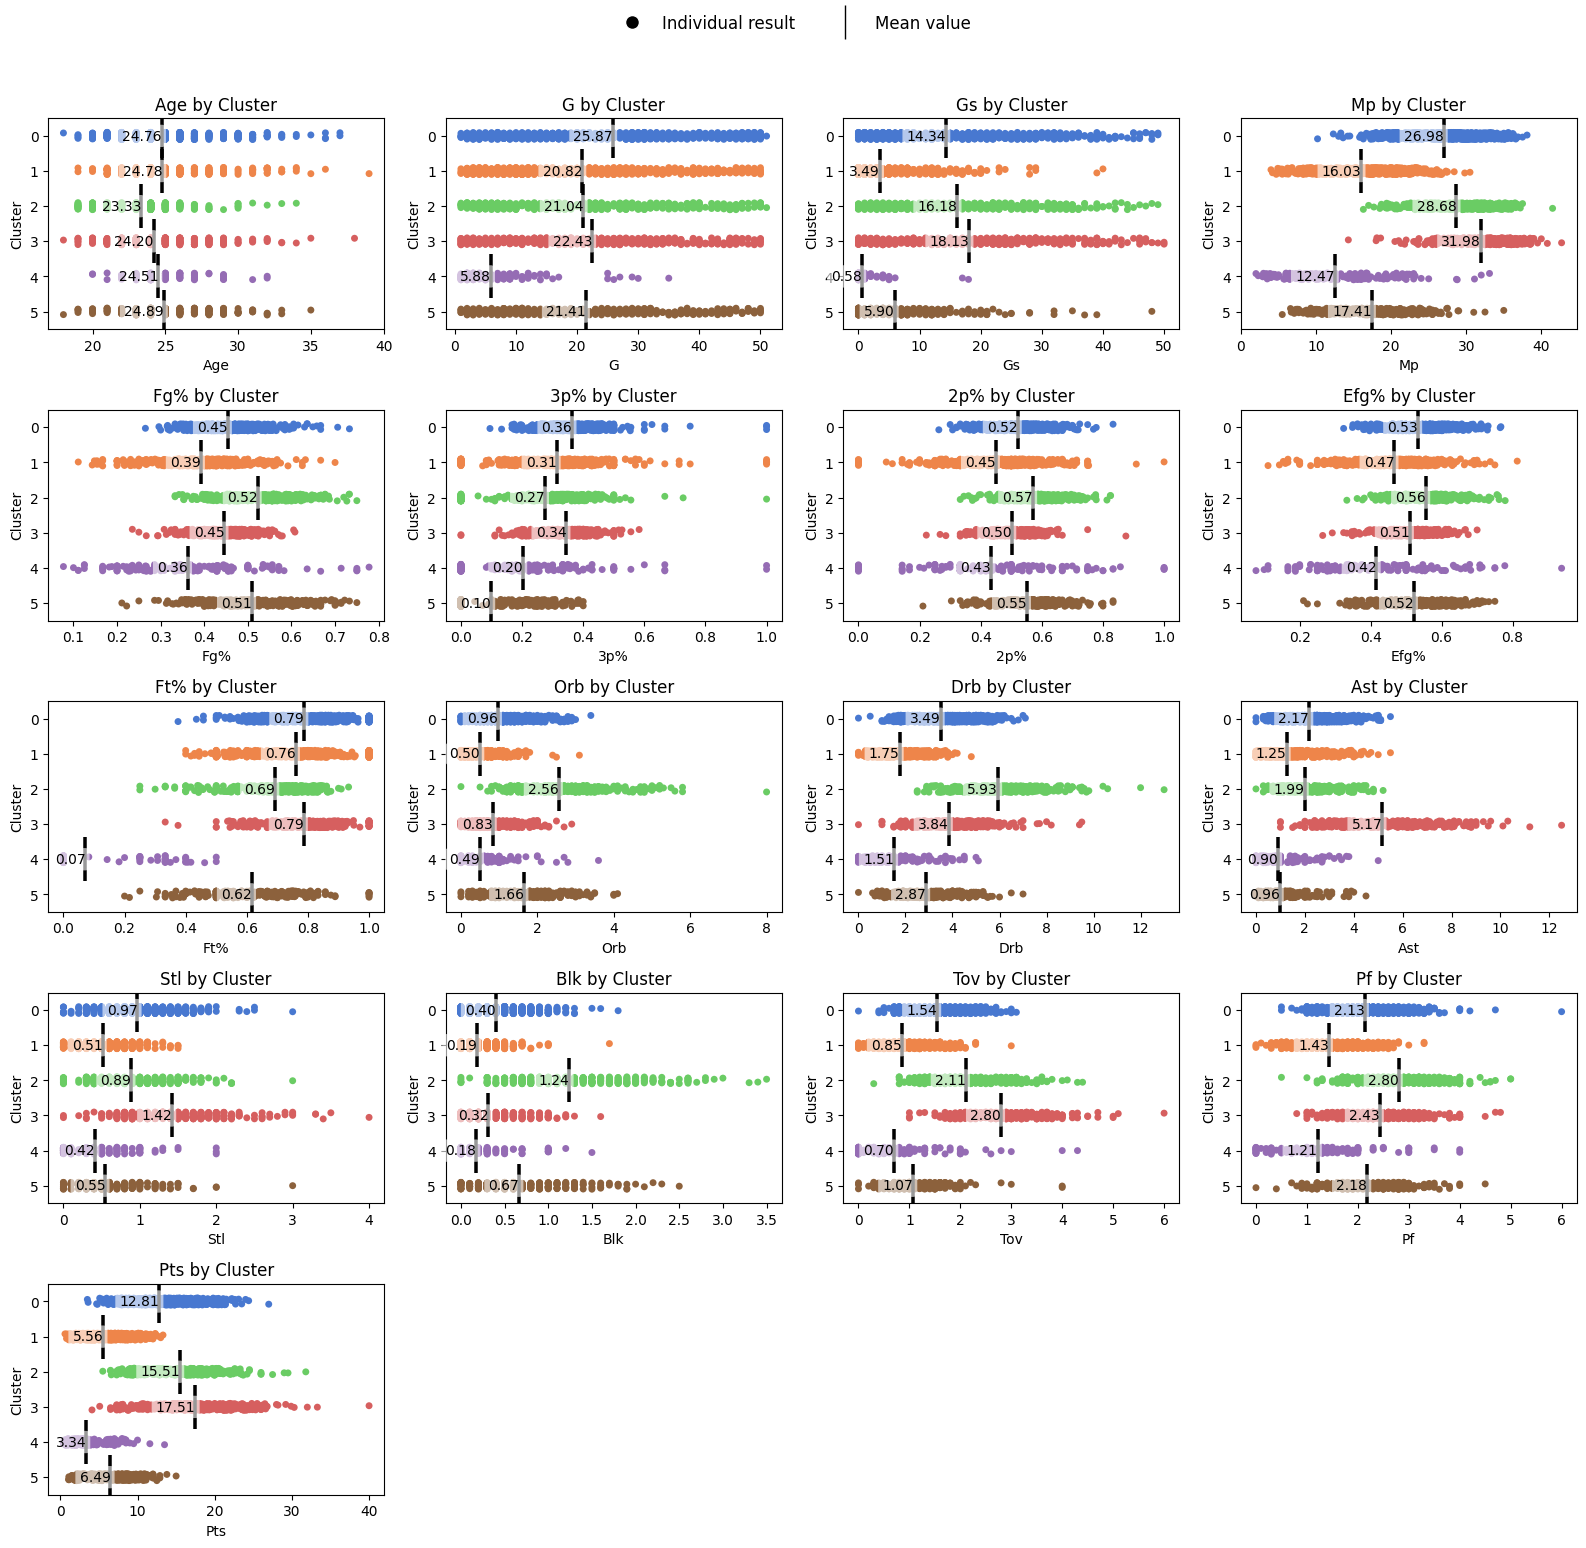

In [84]:
visualize_cluster_lollipop_panel(datosJugadores, 'cluster_kmeans_sin_temporales', variablesClusterVisualizar)

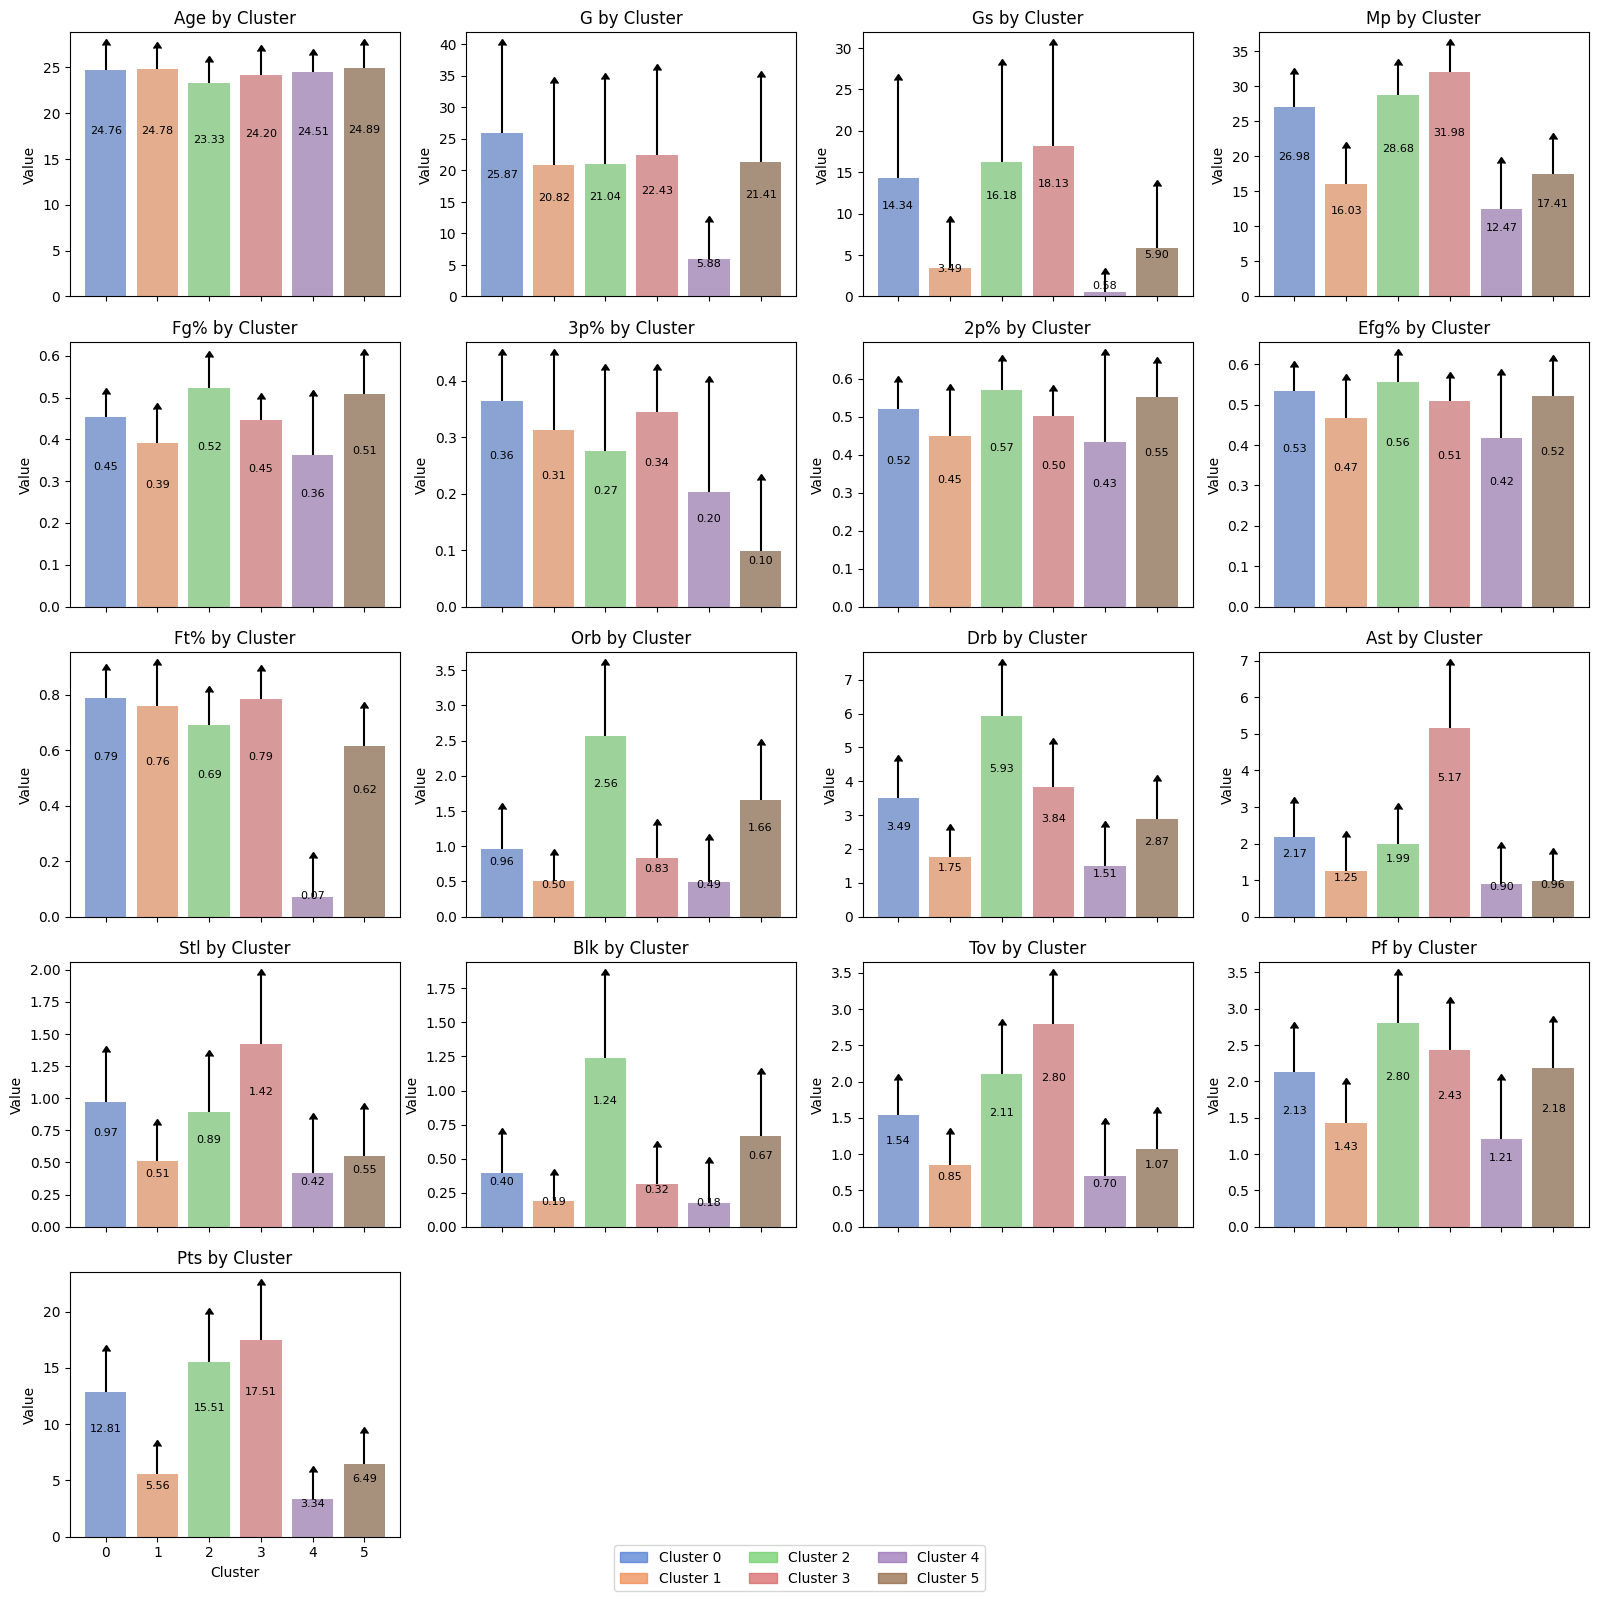

In [85]:

# Llamar a la función para visualizar los clusters
visualize_cluster_means(datosJugadores, 'cluster_kmeans_sin_temporales', variablesClusterVisualizar)

Para el clustering jerarquico elimino las variables que tienen que ver con  el número de partidos jugados, para ver si podemos encontrar una aproximación que no discrimine tanto por la experiencia y se centre en los parametros ofensivos y defensivos del juego

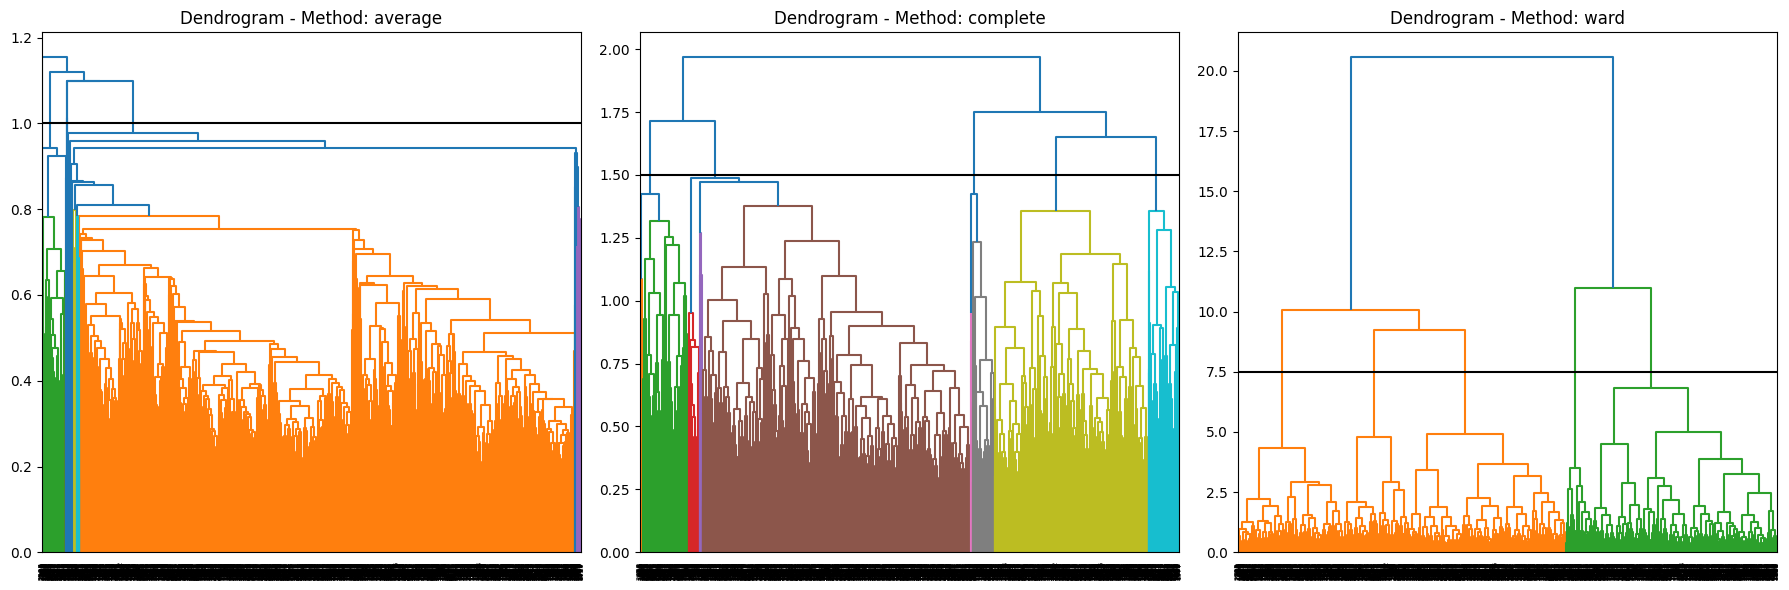

In [86]:


# Datos de ejemplo (reemplaza esto con tus propios datos)
#datosJugadores = [...]  # Datos de los jugadores
variablesCluster_jerarquico =  [var for var in variablesCluster if 'G_scal' not in var and 'GS_scal' not in var]  # Variables a utilizar en el clustering

# Definir los métodos y distancias de corte para cada método
metodos_distancias = [
    ('average', 1),    # Método 'average' con distancia de corte 1.7
    ('complete', 1.5),   # Método 'complete' con distancia de corte 1.5
    ('ward', 7.5)        # Método 'ward' con distancia de corte 5.0
]

# Crear una figura para mostrar los dendrogramas juntos
fig, axs = plt.subplots(1, 3, figsize=(18, 6))  # 1 fila, 3 columnas para cada dendrograma

# Iterar sobre cada método y distancia de corte
for i, (metodo, distancia) in enumerate(metodos_distancias):
    # Calcular el linkage_data para el método actual
    linkage_data = linkage(datosJugadores[variablesCluster_jerarquico], method=metodo)
    
    # Graficar el dendrograma en el subplot correspondiente
    dendrogram(linkage_data, ax=axs[i])
    axs[i].axhline(y=distancia, c='k')  # Línea horizontal en la distancia de corte
    axs[i].set_title(f'Dendrogram - Method: {metodo}')  # Título con el tipo de método

    # Obtener los clusters usando cut_tree con la distancia de corte
    clusters = cut_tree(linkage_data, height=distancia)
    cluster_ids = [f'cluster_jerarquico_{metodo}_{cluster[0]}' for cluster in clusters]
    
    # Agregar los ids de los clusters como nueva columna en los datos de jugadores
    datosJugadores[f'cluster_jerarquico_{metodo}'] = cluster_ids

# Ajustar el diseño de los subgráficos y mostrar la figura
plt.tight_layout()
plt.show()

# Ahora datosJugadores contendrá columnas adicionales para cada método de clustering con nombres de clusters específicos
# Por ejemplo:
# datosJugadores['cluster_jerarquico_average'] contendrá los nombres de los clusters obtenidos con método 'average'
# datosJugadores['cluster_jerarquico_complete'] contendrá los nombres de los clusters obtenidos con método 'complete'
# datosJugadores['cluster_jerarquico_ward'] contendrá los nombres de los clusters obtenidos con método 'ward'


En la figura anterior podemos ver tres posibilidades de clustering jerarquico utilizando tres metodos matemáticos diferentes para su generación, y en todos ellos se ha utilizado la distancia euclidea. A la hora de decidir cuantos clusters se generaban, la distancia de corte se ha establecido una vez vista la representación gráfica. En el caso del metodo average una distancia de 1, en el metodo completo una distancia de 1.5 y en el método Ward una distancia de 7.5. Con estas distancias podiamos conseguir un número de clusters similar al obtenido con el metodo k-means y así poder ver si habia cierta concordancia con ambos metodos.  Como vemos en los siguientes resultados, y como era de esperar, las distintas metodologías utilizadas nos llevan a obtener distintos resultados. 

En la metodologia average como observamos no hace una agrupación optima para el objetivo que queremos. Este metodo se basa en calcular la distancia mas cercana entre entre cada par de grupos (inicialmente individuos) utilizando alguna medida de distancia (en nuestro caso la distancia euclidiana). Se identifican los pares mas cercanos en una matriz de distancias y se unen los grupos en un solo nodo. Finalmente se actualiza la matriz de distancias entre el grupo nuevo formado y el resto de individuos. Esta nueva distancia se calcula como el promedio ponderado de las distancias de todos los elementos del cluster con el resto de individuos.  
En la practica vemos que con la distancia que hemos usado como punto de corte obtenemos seis clusters, cuatro de ellos residuales. No es una agrupación util para nuestro objetivo.

Text(0, 0.5, 'Frequency')

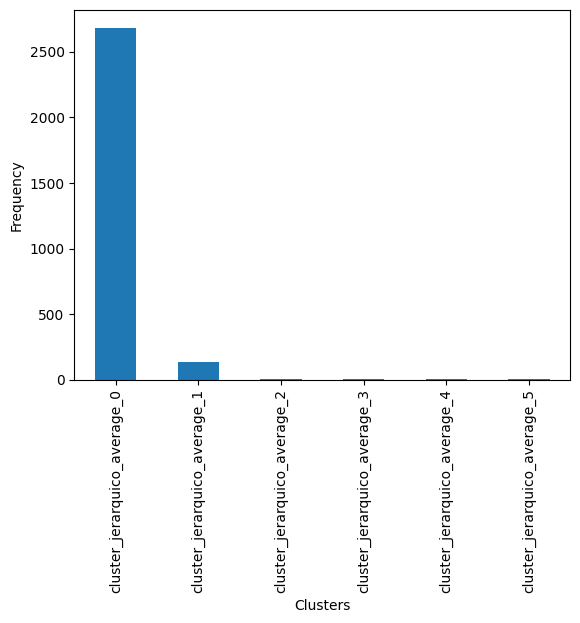

In [87]:
ax = datosJugadores['cluster_jerarquico_average'].value_counts().plot(kind='bar')
ax.set_xlabel("Clusters")
ax.set_ylabel("Frequency")

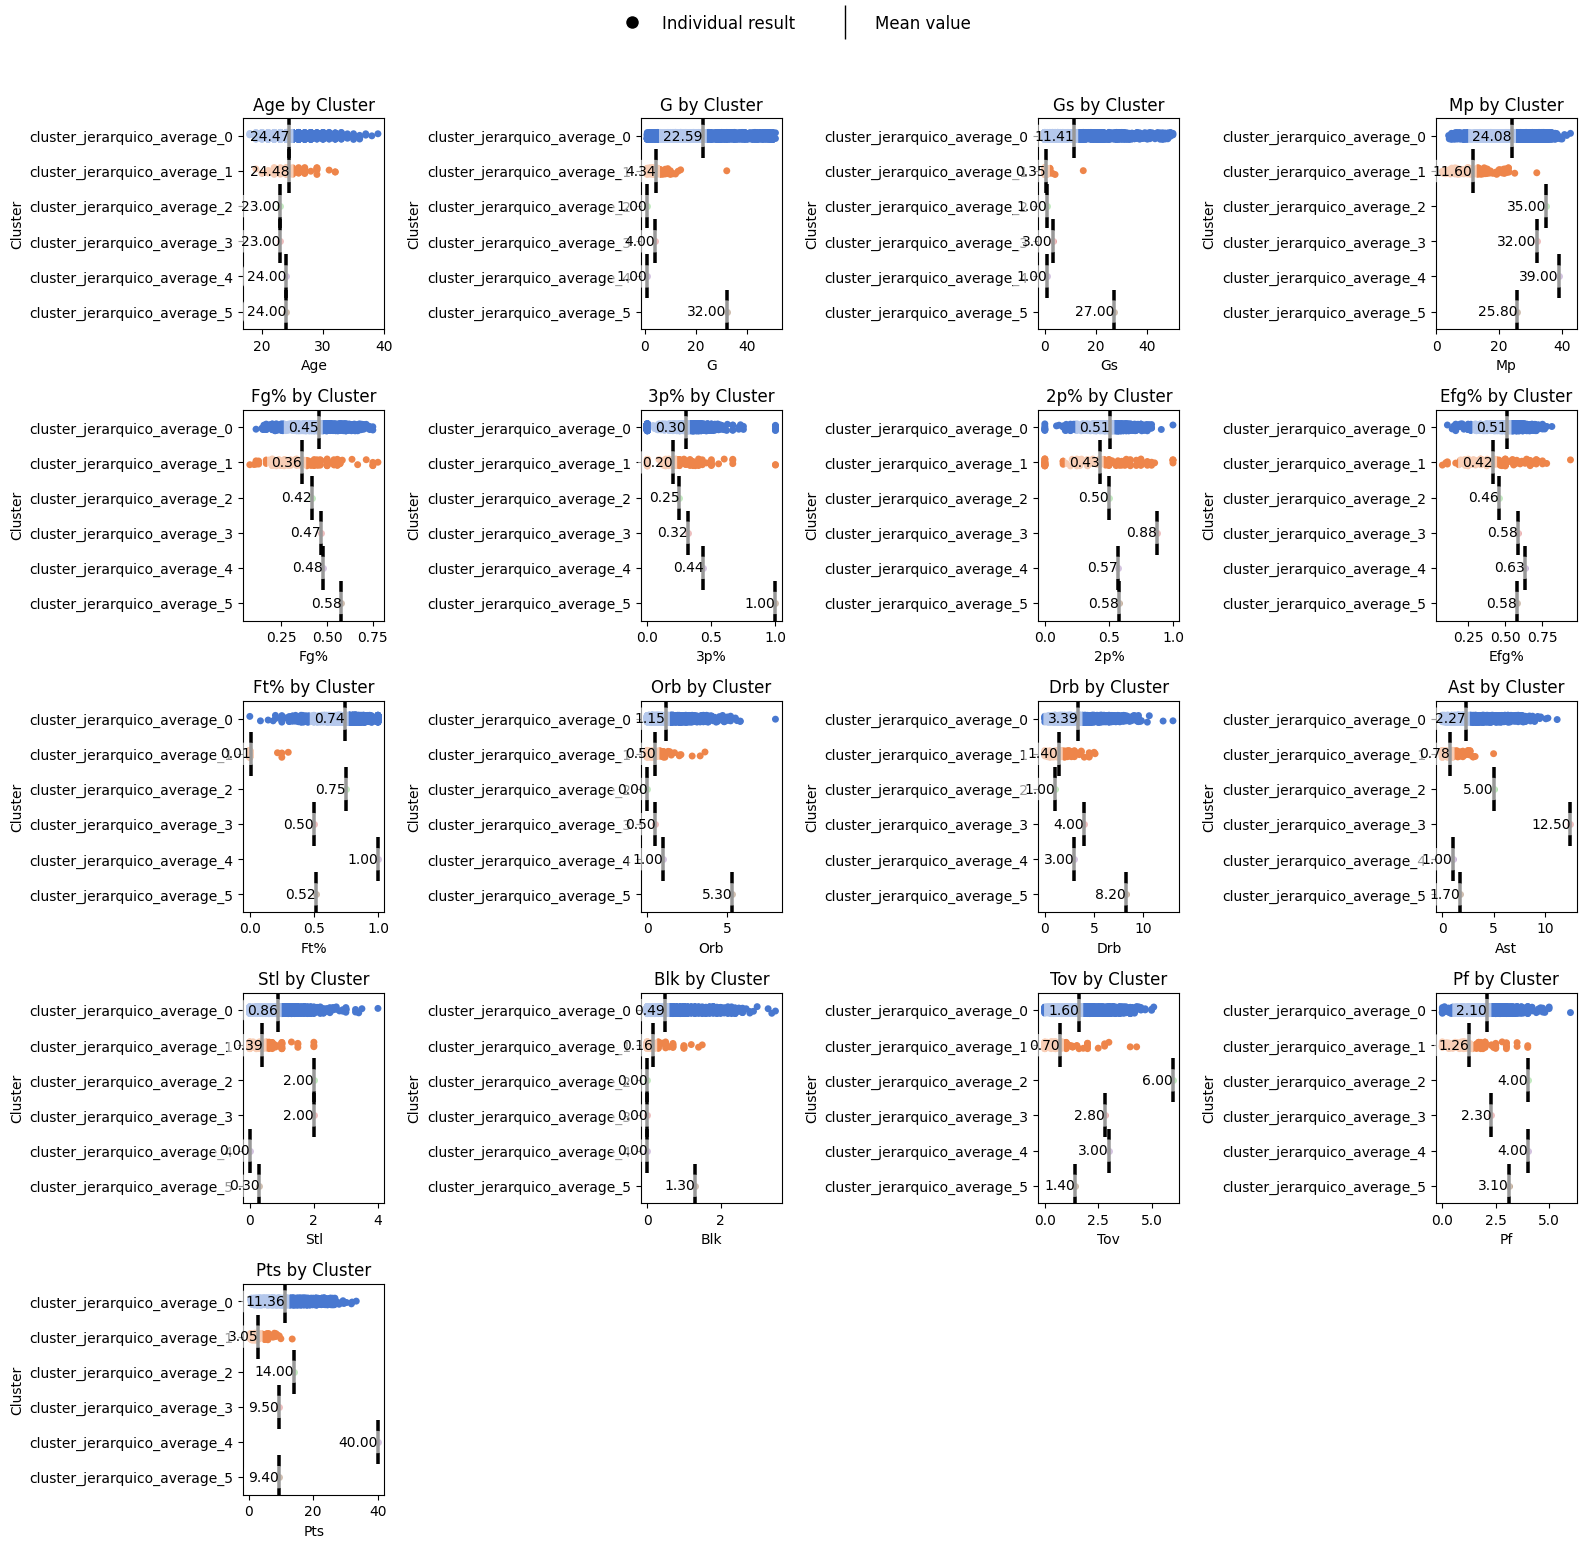

In [88]:
visualize_cluster_lollipop_panel(datosJugadores, 'cluster_jerarquico_average', variablesClusterVisualizar)

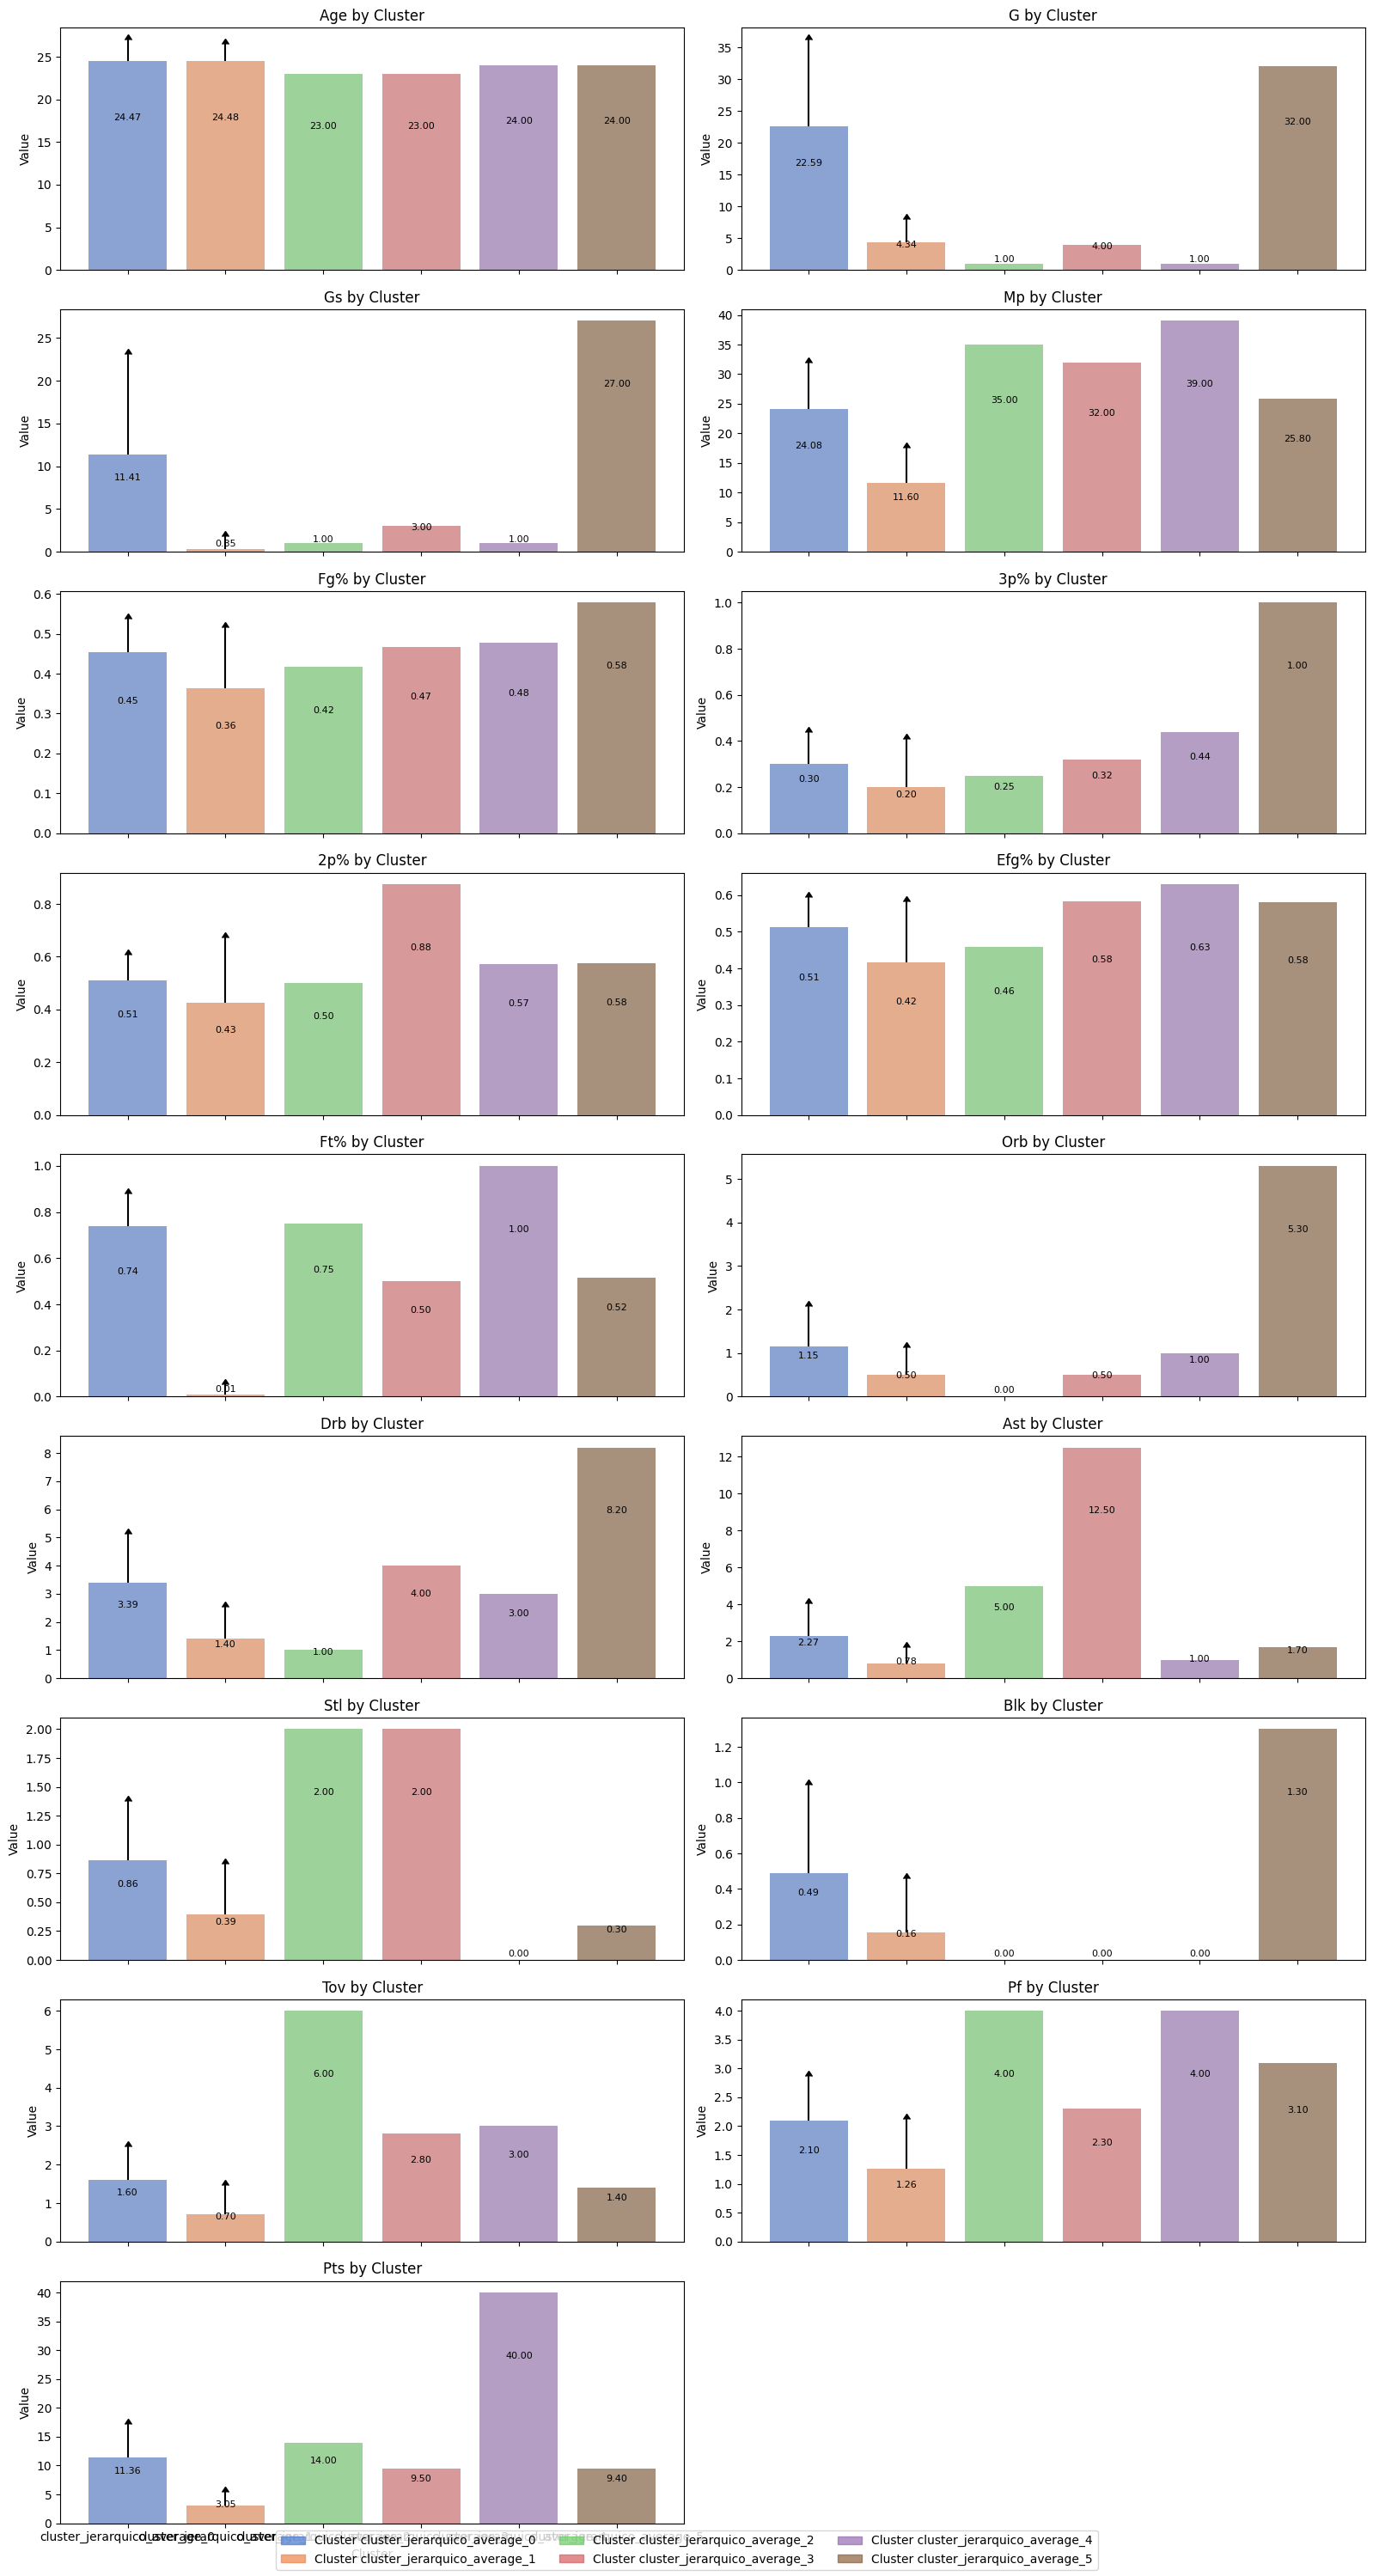

In [89]:
visualize_cluster_means(datosJugadores, 'cluster_jerarquico_average', variablesClusterVisualizar,num_cols=2,figsize=(16, 30))

Utilizando el metodo completo, que se basa en usar la distancia mas lejana entre pares de individuos, obtenemos cinco clusters, tres de ellos con una frecuencia inferior a 200 individuos. 

Text(0, 0.5, 'Frequency')

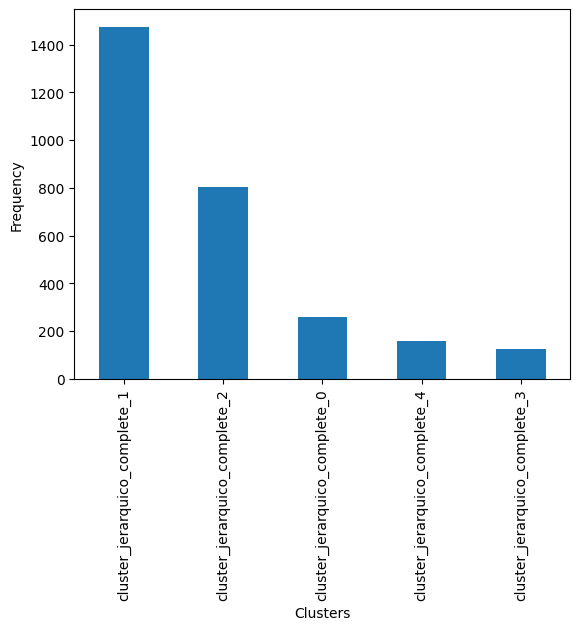

In [90]:
ax = datosJugadores['cluster_jerarquico_complete'].value_counts().plot(kind='bar')
ax.set_xlabel("Clusters")
ax.set_ylabel("Frequency")

Podemos ver que en los **cluster 0** y **cluster 1** podemos ver dos perfiles de jugadores claros. El cluster 0 es un perfil de jugador que destaca en el número de rebotes tanto ofensivos como defensivos, como sobre todo en el número de tapones, mas eficiente en el tiro de dos que en el de tres. El cluster 1 es mas amplio, de hecho el mas frecuente, jugadores eficientes en el tiro en todas sus modalidades, con alto numero de asistencias como en perdidas, lo que parece indicar que son activos en la organizacion del juego. Ambos clusters son los que mas puntos generan de media. Luego tenemos los **clusters 2, 3 y 4**, el **cluster 2** es un perfil similar al cluster 1, con la diferencia que es menos eficiente en cuanto al tiro de 3, y sobre todo en cuanto al esfuerzo defensivo en el robo, como en las asistencias, pareceria mas un finalizador a media distancia. El **cluster 3**, es un perfil interesante porque destaca en el tiro de larga distancia con un 46% de acierto, menos esfuerzo defensivo, no destaca en la captura del rebote defensivo ni en los robos. Es un grupo de jugadores que no aportan muchos puntos por partido de media, solo 4.93. Finalmente el cluster 4, destacan en lo negativo por agrupar jugadores con poco acierto en el tiro libre, con solo el 11% de acierto, tienen los numeros mas bajos en cuanto al porcentaje de tiro de 2, tiro de 3. Asi como en el rebote. Sería un perfil de jugador mas limitado o de bajo nivel de los 5 encontrados.


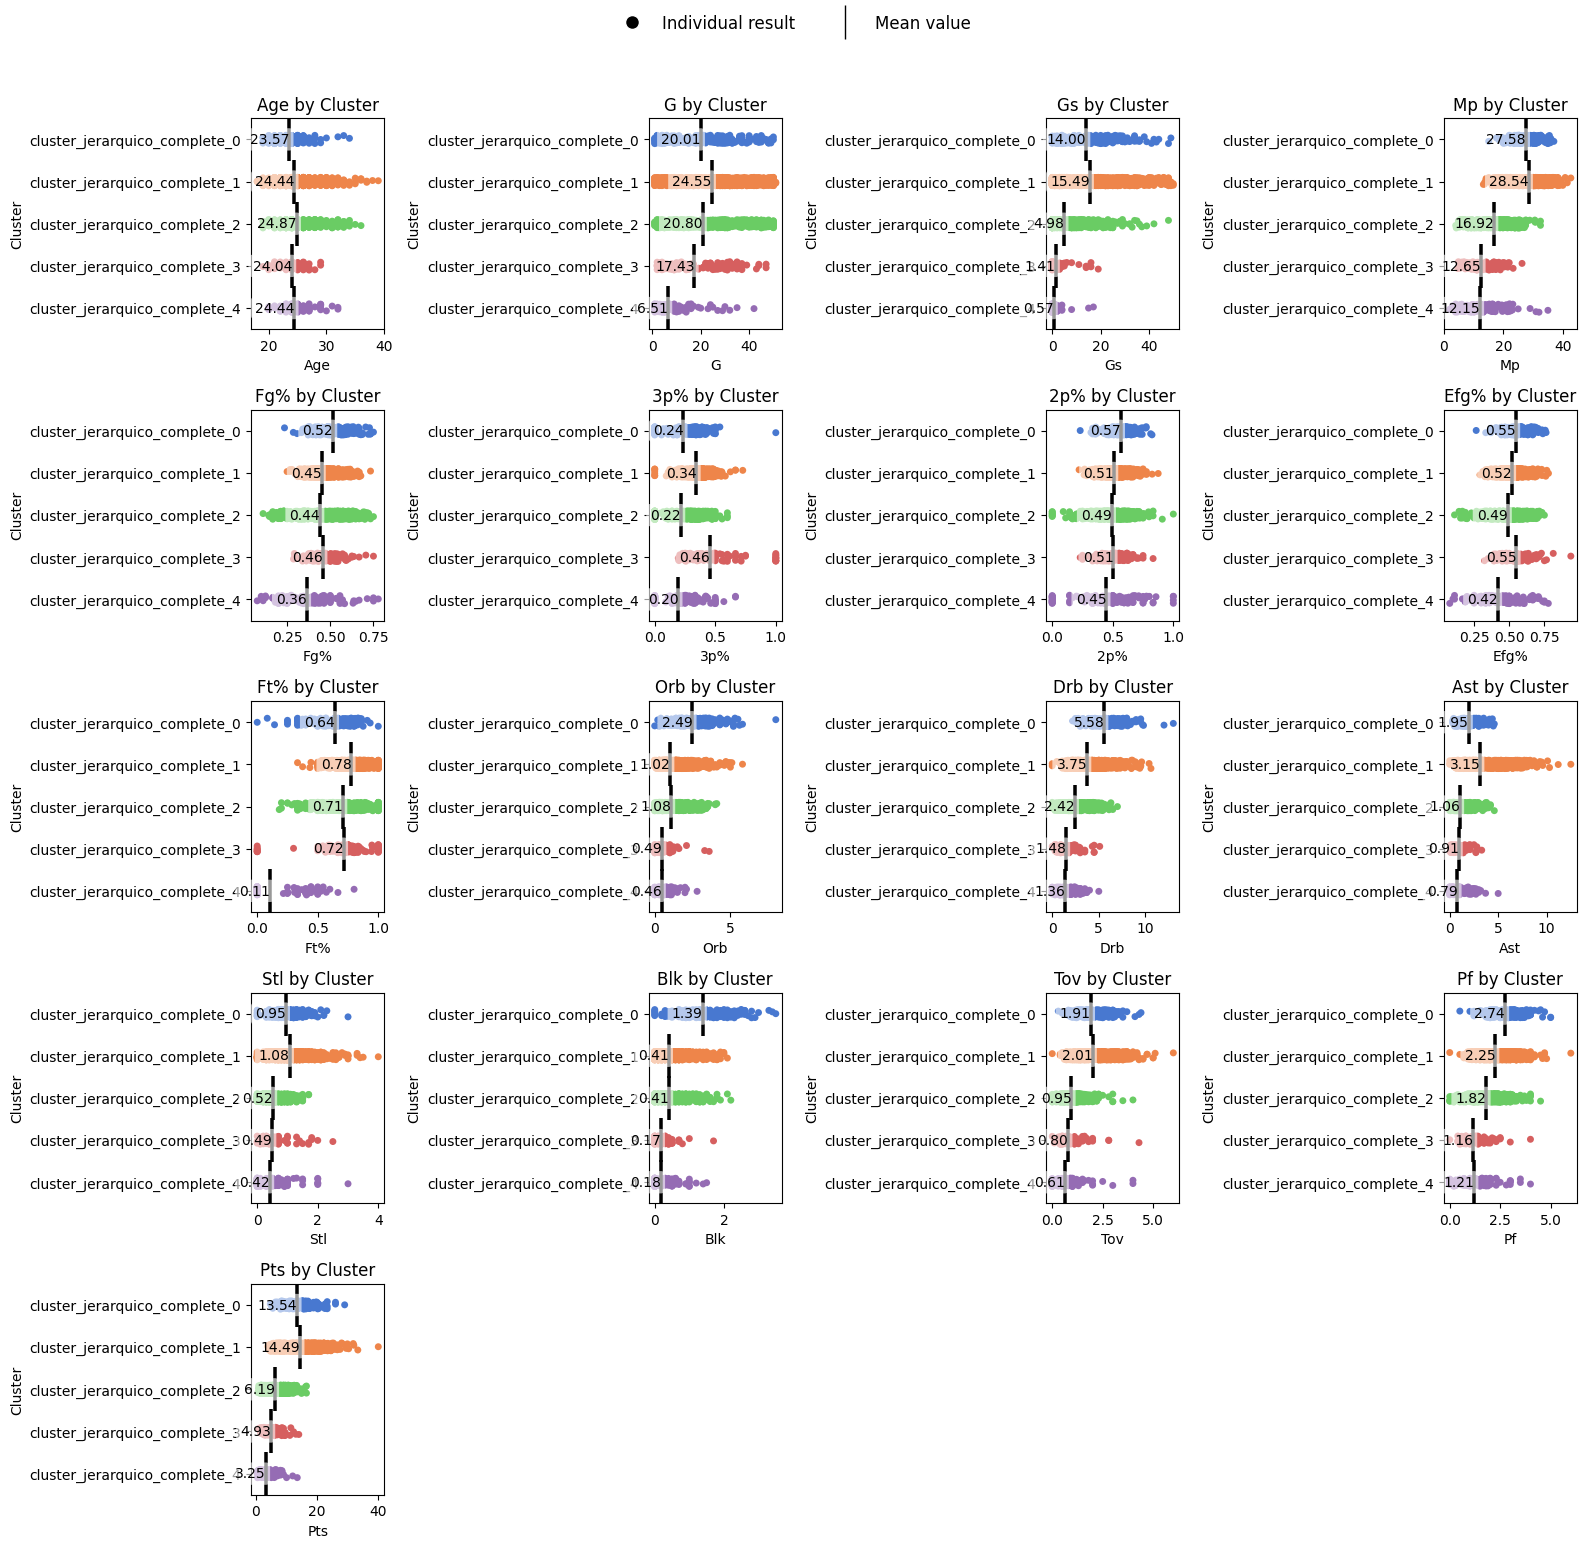

In [91]:
visualize_cluster_lollipop_panel(datosJugadores, 'cluster_jerarquico_complete', variablesClusterVisualizar)

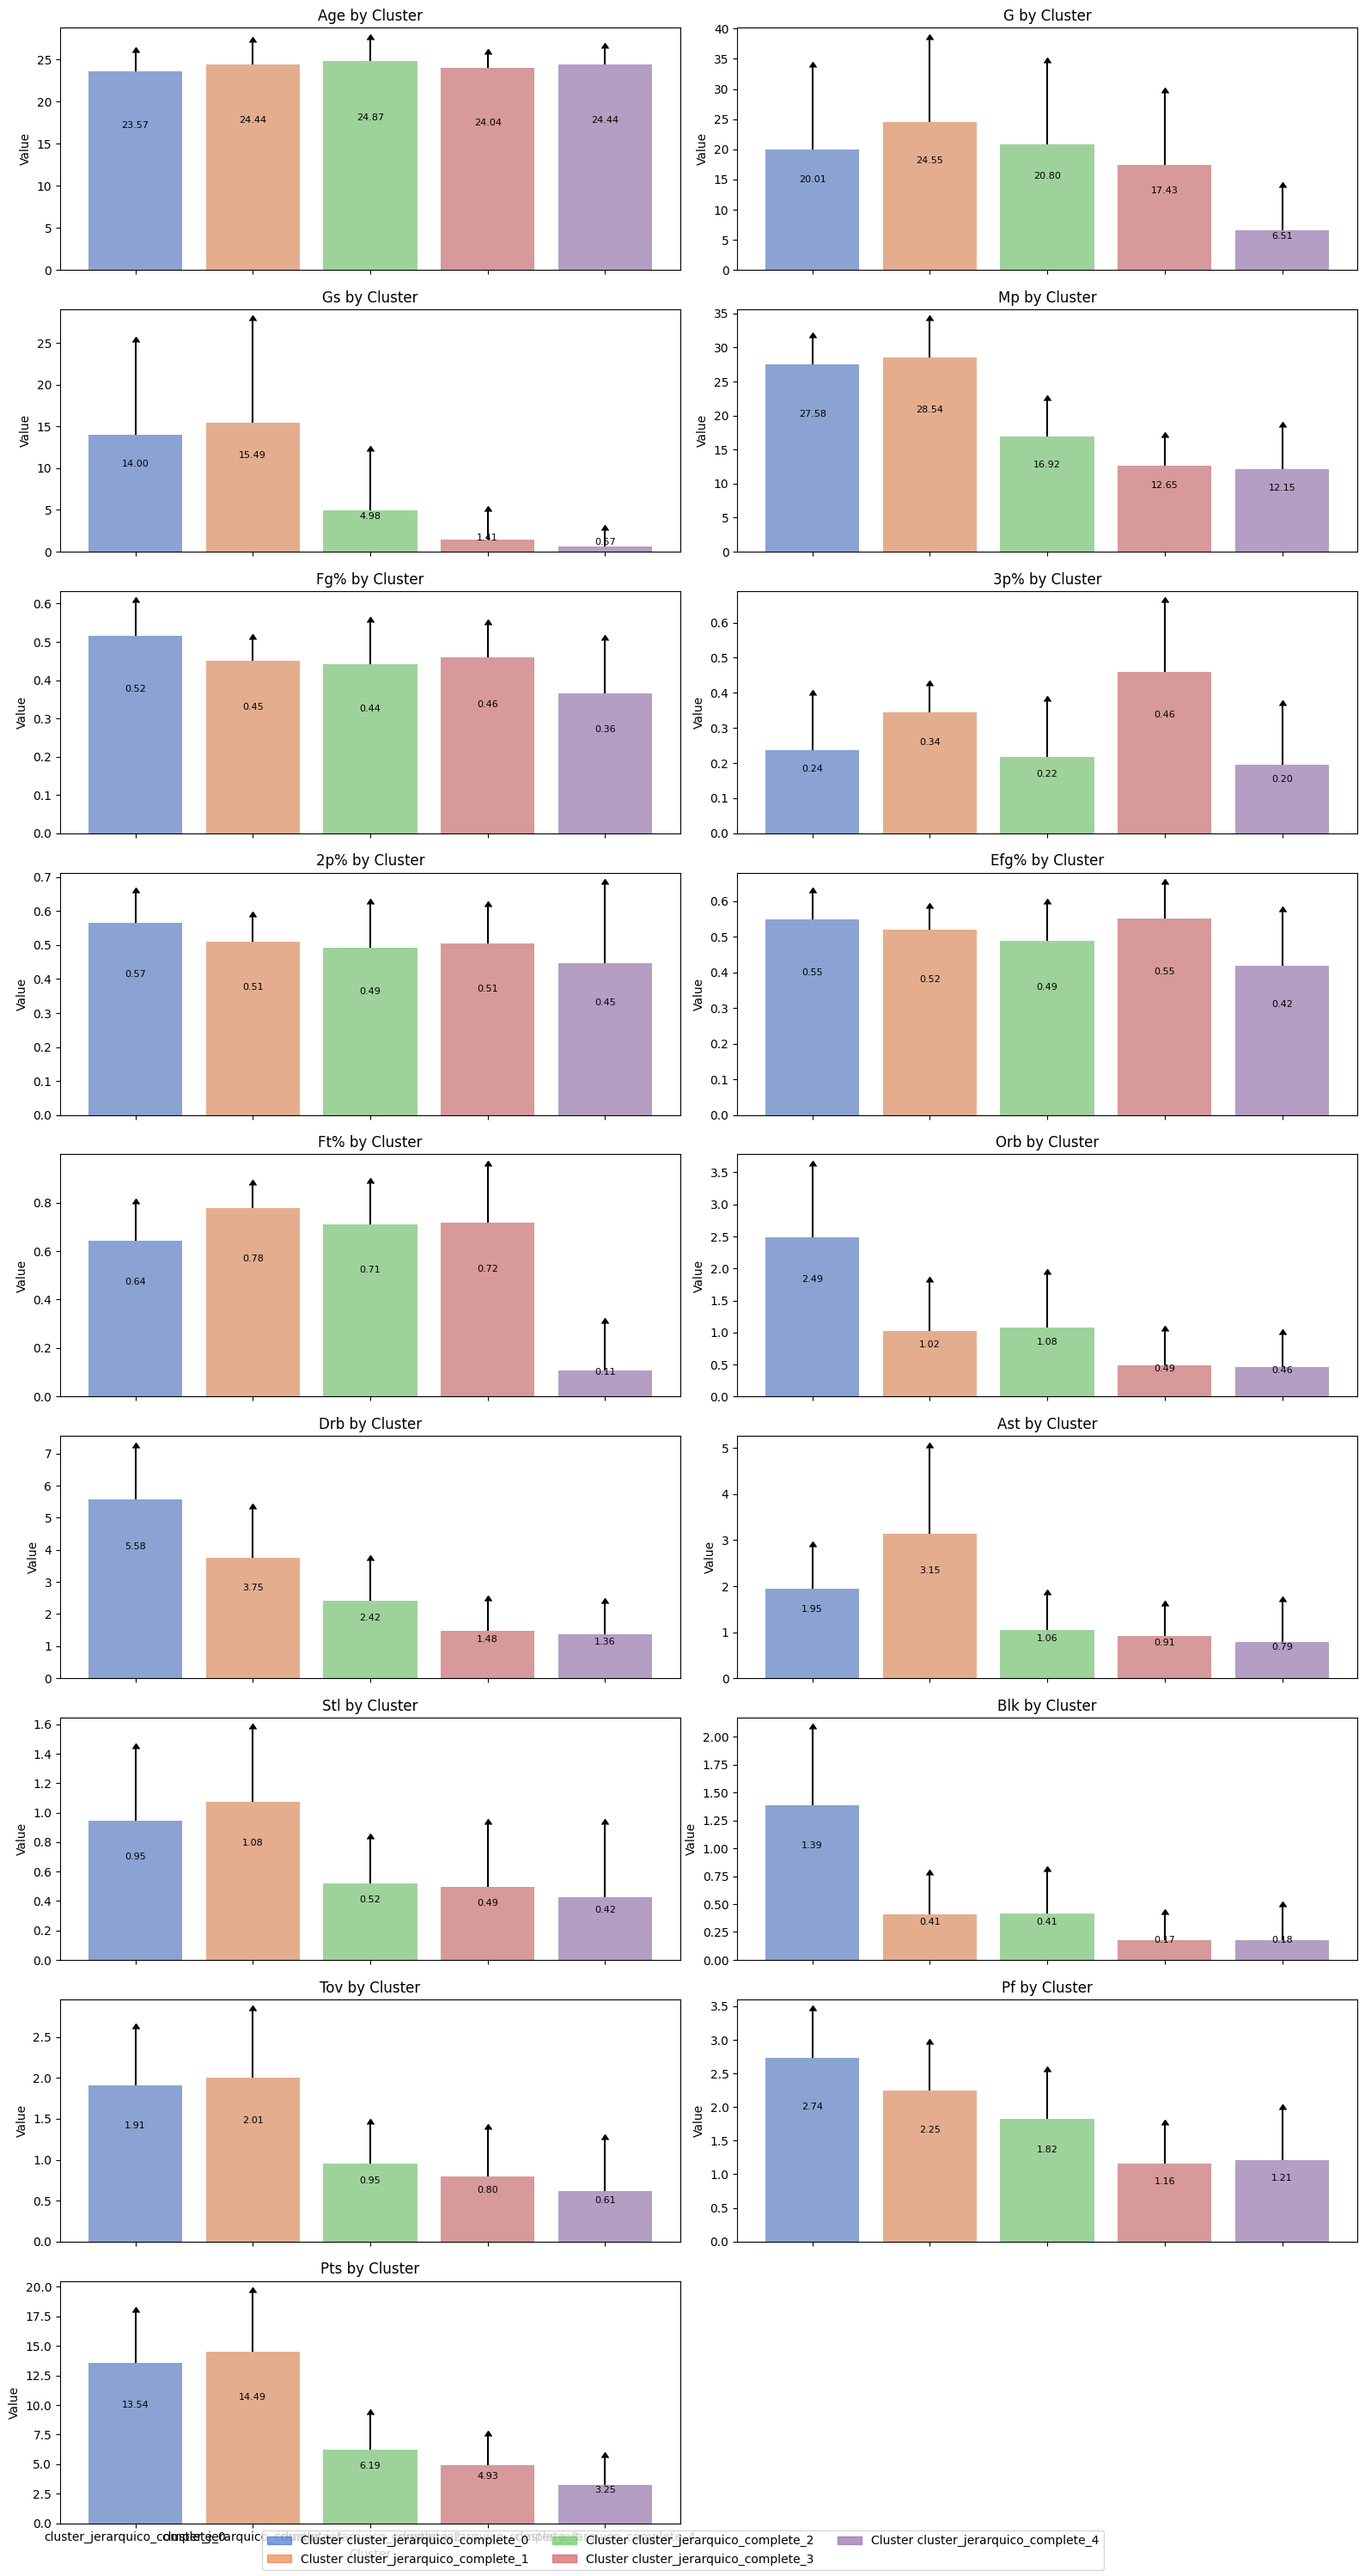

In [92]:
visualize_cluster_means(datosJugadores, 'cluster_jerarquico_complete', variablesClusterVisualizar,num_cols=2,figsize=(16, 30))

In [93]:
#contingency_table = pd.crosstab(datosJugadores['cluster_kmeans'], datosJugadores['cluster_jerarquico_ward'])
# Mostrar la tabla de contingencia
#print(contingency_table)

El método Ward es otro enfoque  en clustering jerárquico, especialmente útil cuando se busca formar clusters compactos y de tamaño similar. A diferencia de los métodos average y completo, el método Ward minimiza la varianza dentro de cada cluster al decidir cómo combinar grupos durante el proceso de agrupamiento. Aunque vemos diferentes tamaños de clusters, es mas homogeneo que en los dos metodos anteriores

Text(0, 0.5, 'Frequency')

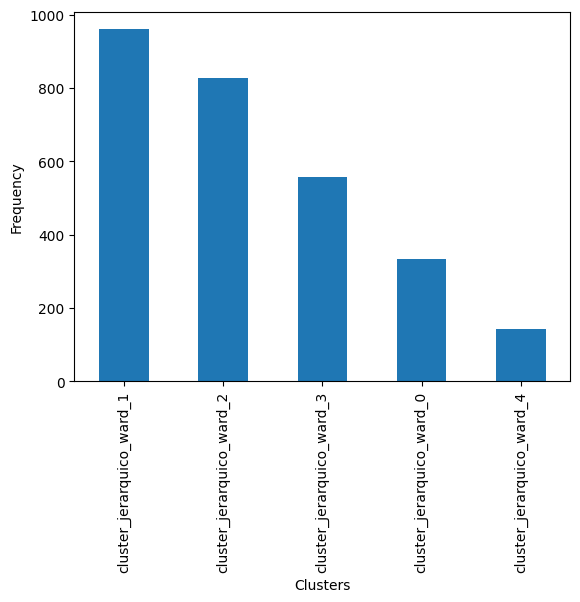

In [94]:
ax = datosJugadores['cluster_jerarquico_ward'].value_counts().plot(kind='bar')
ax.set_xlabel("Clusters")
ax.set_ylabel("Frequency")

Si profundizamos en los clusters, observamos que el **cluster 2** y el **cluster 3** son muy similares en cuanto a eficiencia ofensiva, un porcentaje de tiro de 2 y de tiro de 3 similar, pero que no se traduce en cuanto al número de puntos, ya que los jugadores que estan en el **cluster 3** anotan casí cuatro puntos más por partido de media. Si que es cierto que el **cluster 3** es un jugador mas involucrado en la organizacion del juego, lo vemos tanto en el numero de perdidas, como en el número de robos, y sobre todo en el número de asistencias.  El **cluster 0**e staríamos de nuevo con un perfil que encajaria bien en un pivot, alto numero de tapones, rebotes ofensivos y rebotes defensivos, mas eficiente en el tiro de 2 que en el tiro de 3. El **cluster 1** sería un jugador finalizador, poco involucrado en la organización del juego, bajo número de rebotes, tanto ofensivos como defensivos, bajo número de asistencias, y perdidas, aunque esta eficiencia ofensiva no se ve traducida al número de puntos de por partido, con solo 5.04.  Finalmente tenemos el **cluster 4**, aunque no la hayamos utilizado para generar los clusters, si nos fijamos en el  número de partidos jugados, son el cluster que menos juega, y que menos aportan en todos los aspectos, jugadores residuales. 

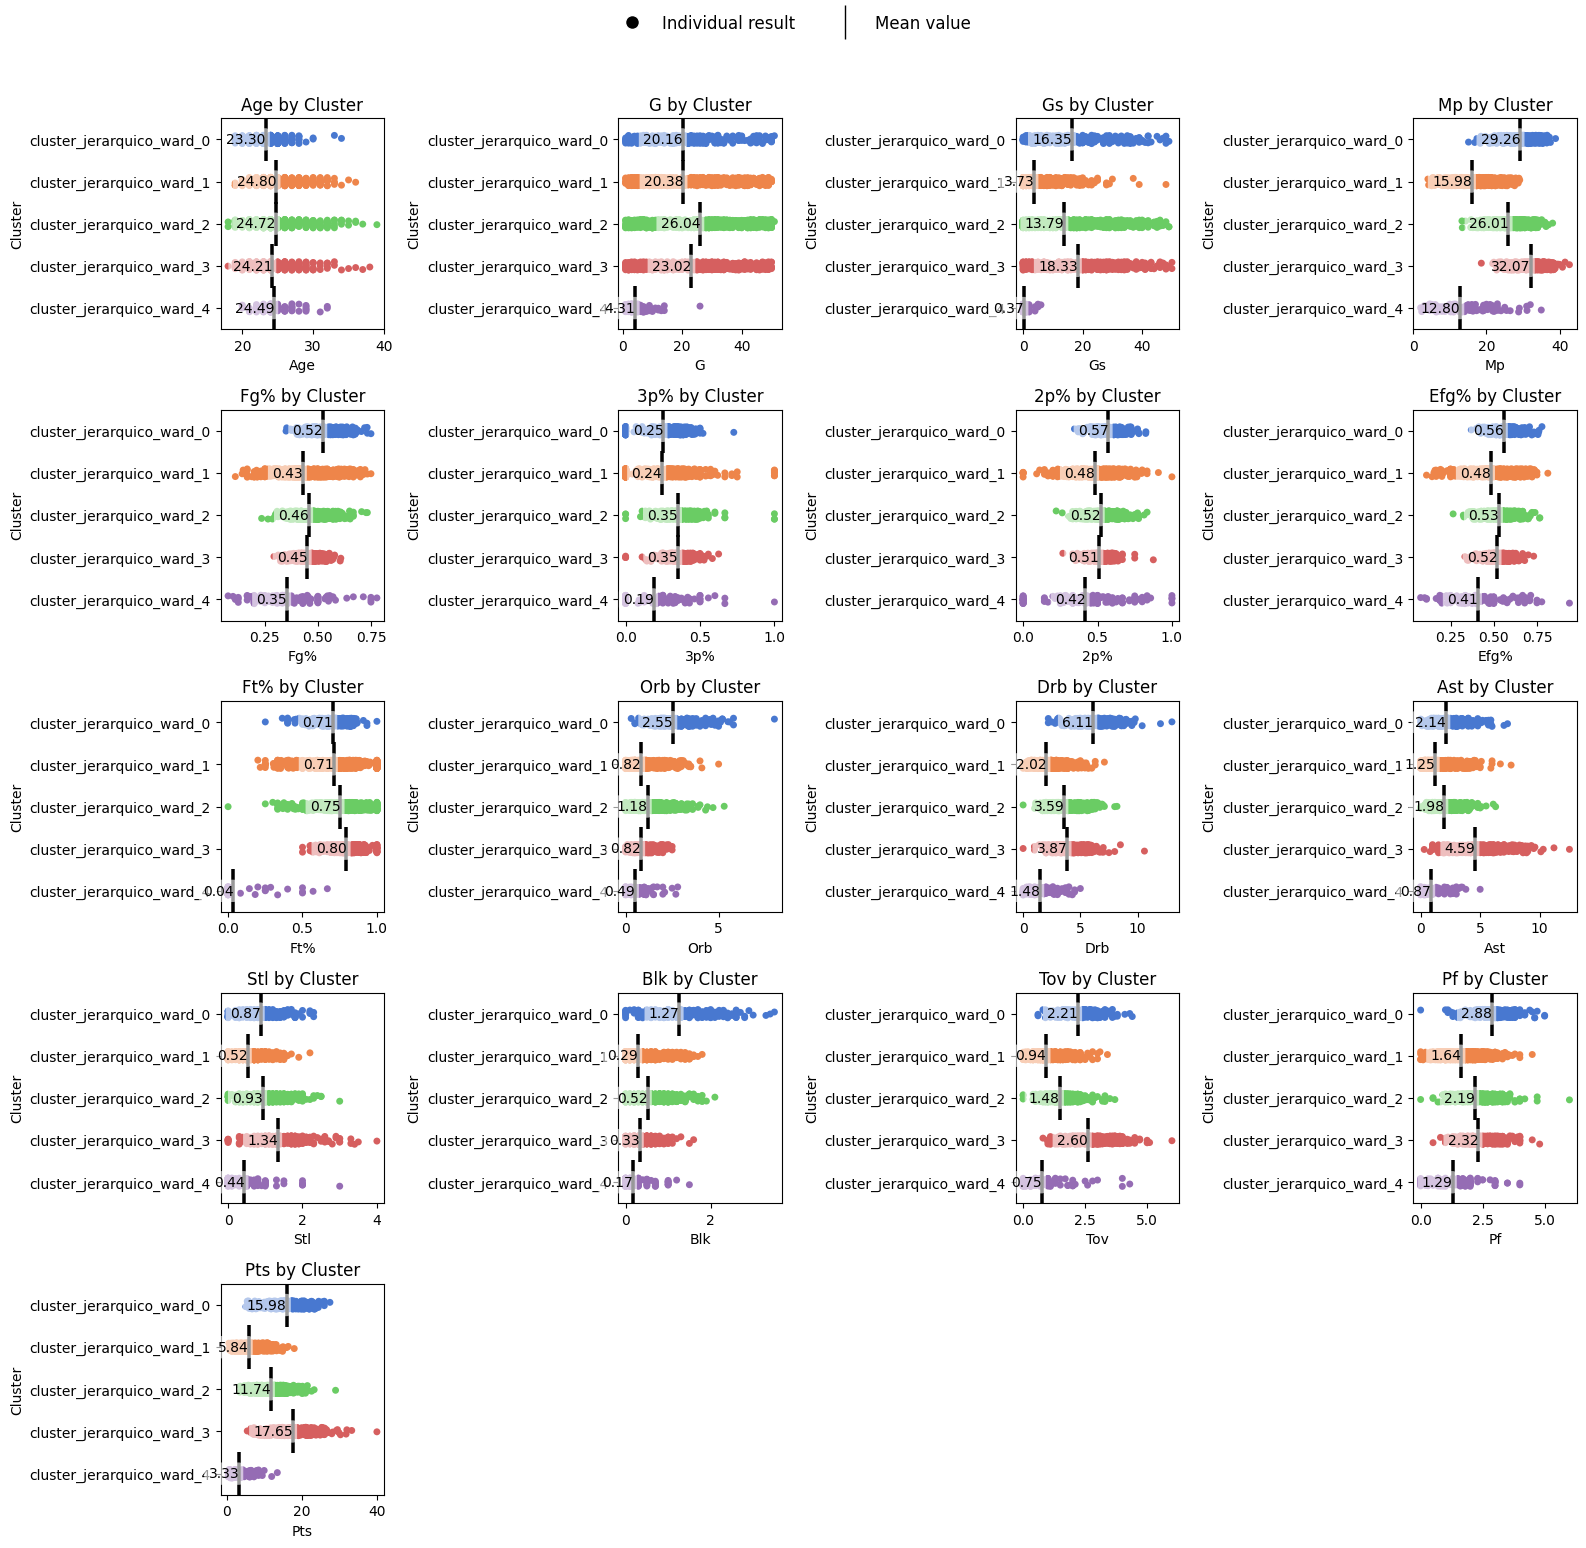

In [95]:
visualize_cluster_lollipop_panel(datosJugadores, 'cluster_jerarquico_ward', variablesClusterVisualizar)

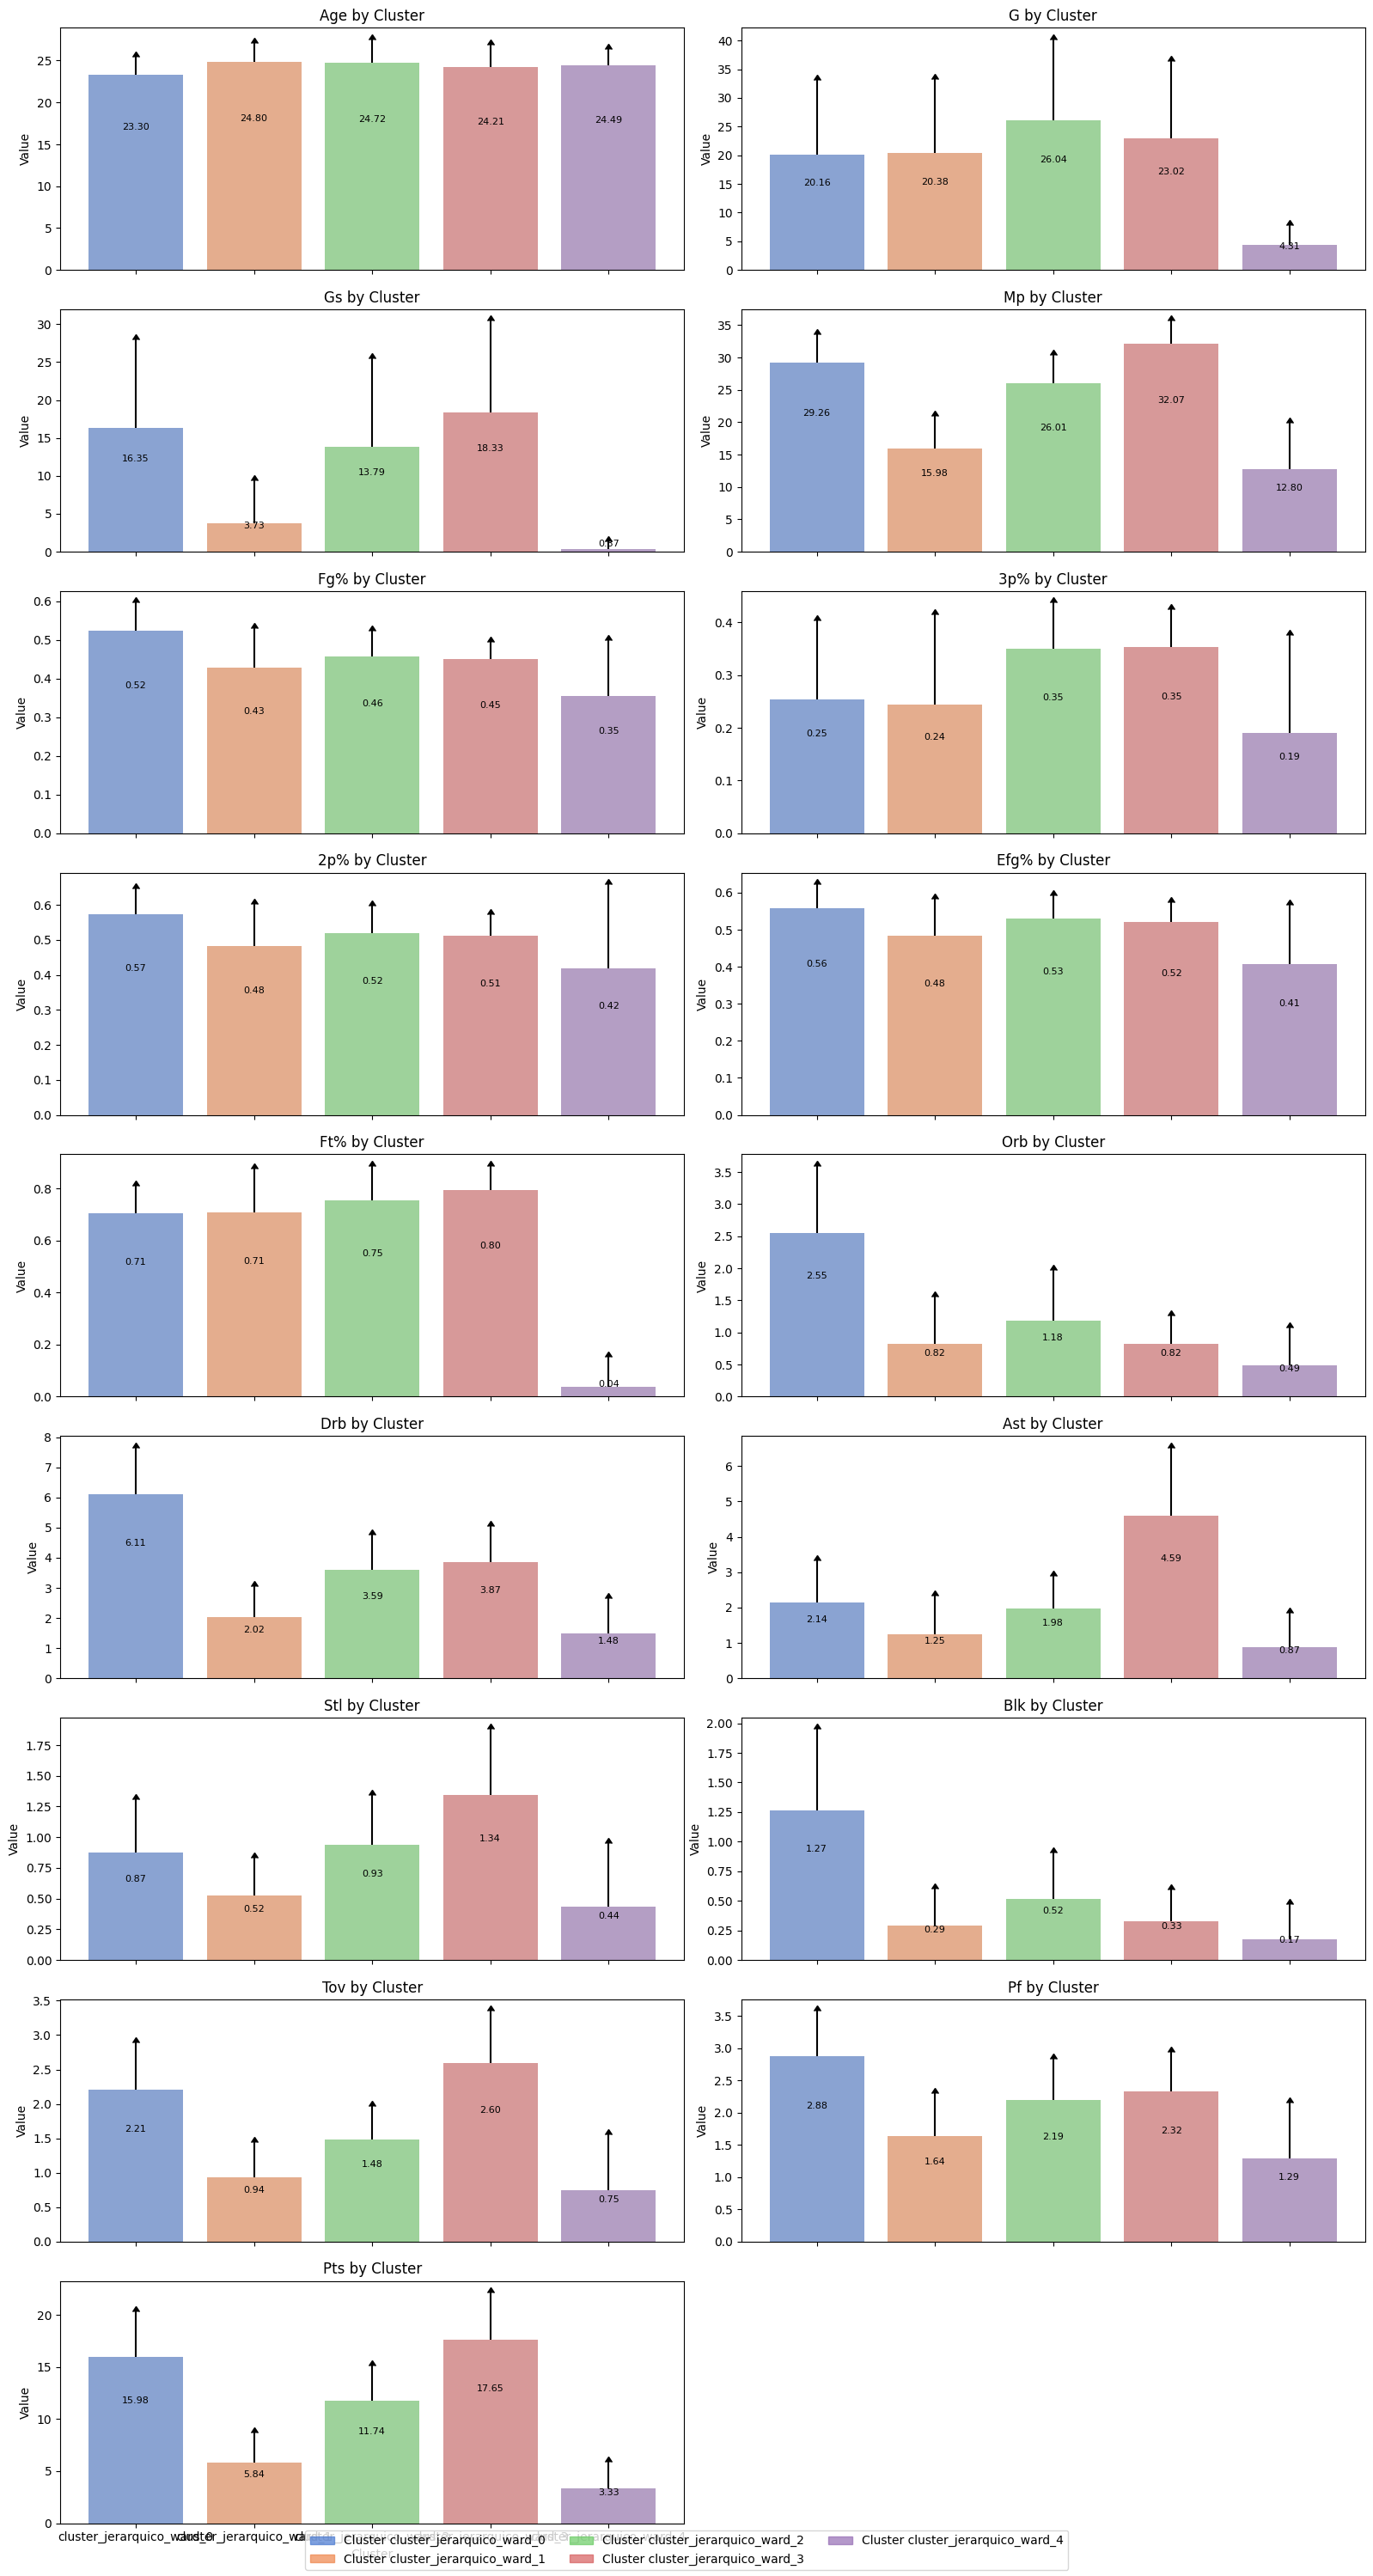

In [96]:
visualize_cluster_means(datosJugadores, 'cluster_jerarquico_ward', variablesClusterVisualizar,num_cols=2,figsize=(16, 30))

### Conclusión

En resumen, de los cuatro metodos de clustering utilizados, en tres de ellos hemos podido extraer conocimiento con sentido baloncestistico, ya que hemos identificado una serie de perfiles de jugadores basandonos en las caracteristicas estudiadas. Se podría ampliar este estudio analizando las concordancias entre los clusters identificado a través del estudio de asociación estadística entre variables (Test Chi-Cuadrado, Fisher) para ver si aceptar que haya independencia estadistica, esto significaria que los perfiles que identificamos con los distintos clusters son independientes, o si rechazamos esta hipotesis querria decir que estamos encontrando perfiles similares con ambos criterios.

A la hora de hacer la tarea dos, podriamos utilizar indiferentemente la clasificación hecha con el metodo k-means o con el método ward. No obtenemos grupos muy reducidos en cuanto a tamaño, aunque tengamos que tener en cuenta que las clases no están balanceadas posterioremente. En ambos etiquetados hemos visto una serie de perfiles identificables en cuanto a caracteristicas del juego. 

## Tarea 2: 
A partir de los perfiles anteriores construye y entrena un clasificador que permita determinar de forma rápida el perfil de un jugador en base a sus estadísticas. Utiliza todos los datos disponibles salvo los de la temporada 23-24.


- Generación de un clasificador sobre las etiquetas anteriormente definidas (selección de hiperparámetros, entrenamiento y validación, estudio del balanceo de clases, matriz de confusión, funciones de coste, etc.).
- Justificación modelos utilizados.
- Comparación de rendimiento entre modelos de clasificación (opcional).
- Correcta utilización del clasificador para predicción (se valorará positivamente el guardado o exportación y carga del modelo a y desde un fichero).
- Estudio posibles desbalanceos de clases.

## Arbol de clasificación

El primer clasificador que vamos a utilizar es el arbol de clasificación. En este caso no tenemos porque tener las variables escaladas, porque el resultado es el mismo escaladas o no. La ventaja de no escalar es la interpretabilidad. Nuestro árbol es mucho más facil de leer si trabajamos sobre los parametros originales.

In [97]:
#variablesCluster

In [98]:
variablesClusterOriginales = nuevas_variables = [var for var in variablesClusterVisualizar if var != 'FG%']
#variablesClusterOriginales

In [99]:
#Definición de columnas de entrada al algoritmo.
input_columns= variablesClusterOriginales
#Definición de columna de salida u objetivo.
target_column='cluster_kmeans'

datosJugadores[target_column] = datosJugadores[target_column].astype(str)

X=datosJugadores[input_columns]
y=datosJugadores[target_column]

#Definición de la semilla para garantizar la repetivilidad del ejercicio.
seed=13
#División en train y test (75-25), semilla definida para poder reproducir de nuevo el experimento.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=seed)
(datosJugadores 
  .groupby(target_column)
  .agg(frequency=(target_column, "count")))

frequency
cluster_kmeans           
0                     549
1                     577
2                     569
3                     160
4                     641
5                     325

Definimos una función para ver cuales son los mejores hiperparámetros en el árbol. Concretamente el parámetro param_grid define un conjunto de hiperparámetros para ajustar un modelo de árbol de decisión en un algoritmo de aprendizaje automático. Incluye dos criterios de calidad para medir la calidad de una división en el árbol (gini y entropy), especifica rangos para la profundidad máxima del árbol (de 3 a 6 niveles), y proporciona opciones para el número mínimo de muestras requeridas en una hoja del árbol (10, 20, 50, 100, 200, 300, 400, 500).

In [100]:
# Definimos una función para determinar cuales son los mejores hiperparametros para el arbol de clasificacion
# 
def dtree_grid_search(X,y,nfolds):
    #create a dictionary of all values we want to test
    param_grid = { 'criterion':['gini','entropy'],'max_depth': np.arange(3, 7),'min_samples_leaf' : [10, 20, 50, 100, 200, 300, 400, 500]}
    # decision tree model
    dtree_model=DecisionTreeClassifier()
    #use gridsearch to test all values
    dtree_gscv = GridSearchCV(dtree_model, param_grid, cv=nfolds)
    #fit model to data
    dtree_gscv.fit(X, y)
    return dtree_gscv.best_params_



En nuestro caso el criterio que se utilizará para medir la calidad de una división en el árbol de decisión. Se ha seleccionado 'gini', que es un criterio común basado en el índice de Gini para medir la impureza de los nodos en el árbol. Se ha establecido que el árbol puede crecer hasta una profundidad máxima de 6 niveles desde el nodo raíz hasta las hojas. Finalmente min_samples_leaf: se ha fijado en 10, lo que significa que cada hoja del árbol debe contener al menos 10 muestras después de realizar una división.


In [101]:
dtree_grid_search(X_train,y_train,5)


{'criterion': 'gini', 'max_depth': 6, 'min_samples_leaf': 10}

Ajustamos el modelo con la mejor parametrización

In [102]:

model_arbol = DecisionTreeClassifier(random_state=seed,max_depth=5,criterion='gini',min_samples_leaf=10)
model_arbol.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=10, random_state=13)

Dibujamos el árbol. La manera de interpretarlo sería la siguiente:

Un jugador que juega menos de 20.5 partidos de titular, que ha jugado menos de 24.5 partidos de media en la G-league que ha jugado menos de 22.55 minutos por partido, que tiene un porcentaje acierto en tiro libre mayor del 35.9% y que coge menos de 3.45 rebotes por partido, sería clasificado como un jugador del cluster 4.

Un jugador que juega menos de 20.5 partidos de titular, que ha jugado menos de 24.5 partidos de media en la G-league que ha jugado más de 22.55 minutos por partido, que coge mas de 1.75 rebotes defensivos por partido, y que hace mas de 1,05 tapones por partido, será clasificado como un jugador del cluster 5



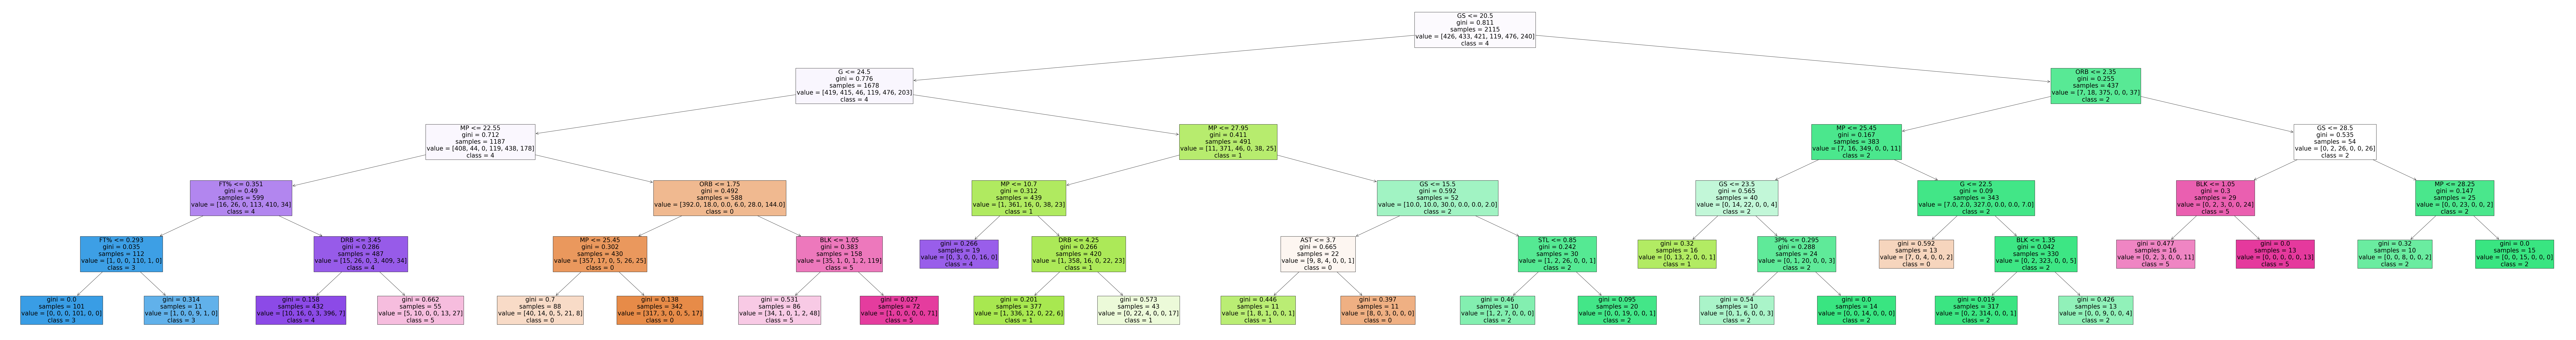

In [103]:
from sklearn.tree import plot_tree
plt.figure(figsize=(190,25))  # set plot size (denoted in inches)
tree.plot_tree(model_arbol, fontsize=25,filled=True,class_names=model_arbol.classes_,feature_names=model_arbol.feature_names_in_)
plt.show()


Para ver que parametros son los mas importantes podemos determinar la importancia de cada predictor en el arbol. La importancia de las características en un árbol de decisión se basa en evaluar cómo cada característica contribuye a hacer que las divisiones en el árbol sean más homogéneas o más informativas (en términos de reducción de la incertidumbre o impureza). Las características que contribuyen más a la mejora de la homogeneidad o la información del árbol se consideran más importantes.

En nuestro estudio las varaibles que mayor importancia tienen son las relativas a los minutos jugados, numero de partidos y número de partidos como titular. 

In [104]:
predictor_importance = pd.DataFrame(
                            {'predictor': X_train.columns,
                             'importance': model_arbol.feature_importances_}
                            )
print("Importancia de los predictores en el modelo")
print("-------------------------------------------")
predictor_importance.sort_values('importance', ascending=False).reset_index(drop=True)

Importancia de los predictores en el modelo
-------------------------------------------


predictor  importance
0         MP    0.269843
1         GS    0.262857
2          G    0.204852
3        FT%    0.116975
4        ORB    0.091104
5        DRB    0.035841
6        BLK    0.012599
7        AST    0.004159
8        3P%    0.001176
9        STL    0.000595
10       Age    0.000000
11       2P%    0.000000
12      eFG%    0.000000
13       TOV    0.000000
14        PF    0.000000
15       PTS    0.000000

Estudiamos el rendimiento de nuestro modelo con los datos de test, hacemos la prediccion de las clases en función de nuestro modelo y luego generamos la matriz de confusion.


La función **classification_report** se utiliza para evaluar el desempeño de un modelo de clasificación mediante el cálculo de varias métricas como precisión, recall, f1-score y soporte para cada clase en un problema de clasificación multi-clase.

- **y_true**: Esta es la lista de etiquetas verdaderas (ground truth) del conjunto de datos de prueba. 

- **y_pred**: Esta es la lista de etiquetas predichas por el modelo para el conjunto de datos de prueba. 

El informe generado por classification_report contiene las siguientes métricas para cada clase (etiqueta) en el problema de clasificación:

- **Precisión (Precision)**
La precisión se calcula como:

$$ \text{Precision} = \frac{\text{Verdaderos Positivos (TP)}}{\text{Verdaderos Positivos (TP) + Falsos Positivos (FP)}} $$


- **Recall (Sensibilidad o Recall)**
El recall se calcula como:

$$ \text{Recall} = \frac{\text{Verdaderos Positivos (TP)}}{\text{Verdaderos Positivos (TP) + Falsos Negativos (FN)}} $$

- **F1-score (Puntuación F1)**
El F1-score se calcula utilizando la siguiente fórmula:

$$ \text{F1-score} = 2 \times \frac{\text{Precision} \times \text{Recall}}{\text{Precision} + \text{Recall}} $$


- **Soporte (Support)**

In [105]:
y_test_pred = model_arbol.predict(X_test)
from sklearn.metrics import classification_report
print(classification_report(y_pred=y_test_pred,y_true=y_test))

              precision    recall  f1-score   support

           0       0.76      0.83      0.79       123
           1       0.81      0.82      0.82       144
           2       0.92      0.92      0.92       148
           3       0.97      0.85      0.91        41
           4       0.87      0.84      0.85       165
           5       0.70      0.69      0.70        85

    accuracy                           0.83       706
   macro avg       0.84      0.83      0.83       706
weighted avg       0.84      0.83      0.83       706



Podemos ver que nuestro modelo ha clasificado correctamente al 83% de los jugadores.

Los jugadores que mejor clasifica son los del cluster 2, de todos los jugadores de este cluster nuestro modelo clasifica correctamente al 92%. (recall)

En el caso del cluster 3 lo que vemos es que de todos los jugadores que nuestro modelo detecta como de este cluster, un 97% si que lo son realmente (precision)

En el caso del cluster 5 son los que nuestro modelo muestra menos fiabilidad, los valores de precision y recall son del 70%

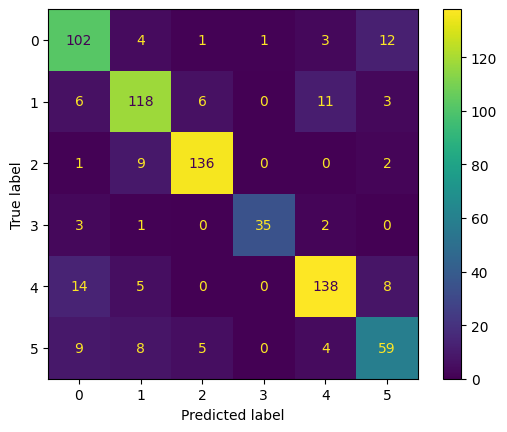

In [106]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_pred=y_test_pred,y_true=y_test)

## Red Neuronal

El segundo modelo elegido para clasificar nuestros datos es una red neuronal

Importamos las diferentes librerias necesarias para generar la red neuronal

In [107]:
# Importación de librerías

# Pandas: Librería para el manejo de datasets
import pandas as pd

# Sklearn: Librería con funciones para transformaciones y modelos de ML
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV, KFold
from sklearn.datasets import make_blobs
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, accuracy_score, cohen_kappa_score
from sklearn.preprocessing import LabelEncoder

# Matplotlib: Librería de visualización de datos
from matplotlib import pyplot as plt

# Keras: Librería para redes neuronales
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras import metrics
import keras_tuner as kt

# Tensorflow: Librería para redes neuronales
import tensorflow as tf

# Numpy: Librería para operaciones matemáticas
import numpy as np


In [108]:
#Definición de la semilla para garantizar la repetivilidad del ejercicio.
seed=13
#Definición de la semilla para el modelo en keras.
keras.utils.set_random_seed(seed)

In [109]:
#variablesCluster

En este caso si que vamos a tener que utilizar las variables escaladas para el buen funcionamiento del algoritmo

In [110]:
#Definición de columnas de entrada al algoritmo.
input_columns= variablesCluster
#Definición de columna de salida u objetivo.
target_column='cluster_kmeans'

datosJugadores[target_column] = datosJugadores[target_column].astype(str)

X=datosJugadores[input_columns]
y=datosJugadores[target_column]

#Definición de la semilla para garantizar la repetivilidad del ejercicio.
seed=13
#División en train y test (75-25), semilla definida para poder reproducir de nuevo el experimento.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=seed)
(datosJugadores 
  .groupby(target_column)
  .agg(frequency=(target_column, "count")))

frequency
cluster_kmeans           
0                     549
1                     577
2                     569
3                     160
4                     641
5                     325

Una manera de definir una red neuronal Multi-layer perceptron sería así, como hemos definido el modelo 4

- hidden_layer_sizes=(50, 50, 50): Esto especifica la arquitectura de la red neuronal. En este caso, se está creando una red con tres capas ocultas, cada una con 50 neuronas.

- learning_rate_init=0.01: Este parámetro define la tasa de aprendizaje inicial para el algoritmo de optimización utilizado para entrenar la red neuronal. La tasa de aprendizaje controla qué tan rápido aprende el modelo durante el entrenamiento.

- solver='lbfgs': Este es el algoritmo de optimización utilizado para entrenar la red neuronal. En este caso, se está utilizando el método 'lbfgs', que es un optimizador de cuasi-Newton limitado (Limited-memory Broyden-Fletcher-Goldfarb-Shanno). Este solver es adecuado para conjuntos de datos pequeños a medianos.

- max_iter=5000: Este parámetro especifica el número máximo de iteraciones (pasos de entrenamiento) que el algoritmo de optimización realizará antes de detenerse, incluso si el algoritmo no ha convergido completamente. Aquí, se ha establecido en 5000 iteraciones.

- random_state=123: Este es un valor semilla que se utiliza para inicializar el generador de números aleatorios interno del modelo. Establecer esta semilla asegura que los resultados sean reproducibles, es decir, que cada vez que se ejecute el modelo con la misma semilla, se obtendrán los mismos resultados.

In [111]:
modelo_4 = MLPClassifier(
                hidden_layer_sizes=(50, 50, 50),
                learning_rate_init=0.01,
                solver = 'lbfgs',
                max_iter = 5000,
                random_state = 123
            )

In [112]:
modelo_4.fit(X=X_train, y=y_train)

MLPClassifier(hidden_layer_sizes=(50, 50, 50), learning_rate_init=0.01,
              max_iter=5000, random_state=123, solver='lbfgs')

Generamos la predicción en los datos de training y en datos de testeo.

In [113]:
#PREDICCIÓN SOBRE TRAIN Y TEST
y_pred_train_aux = modelo_4.predict(X_train)
y_pred_test_aux = modelo_4.predict(X_test)


Por azar, hemos encontrado una red que clasifica a nuestros sujetos de forma optima. Como vemos en la siguiente tabla, con una precision casí del 99%.

In [114]:

print(classification_report(y_pred=y_pred_test_aux,y_true=y_test))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99       123
           1       0.98      1.00      0.99       144
           2       0.99      0.99      0.99       148
           3       0.98      1.00      0.99        41
           4       0.99      0.98      0.98       165
           5       0.99      0.99      0.99        85

    accuracy                           0.99       706
   macro avg       0.99      0.99      0.99       706
weighted avg       0.99      0.99      0.99       706



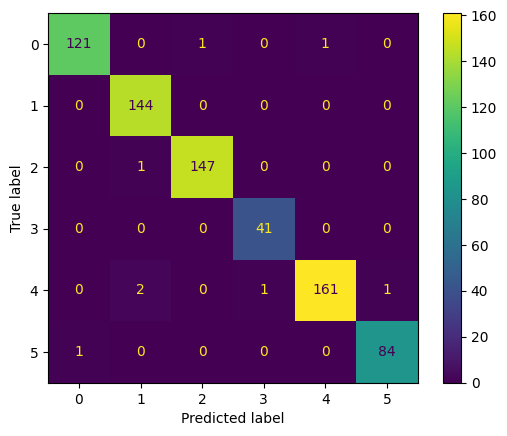

In [115]:
ConfusionMatrixDisplay.from_predictions(y_pred=y_pred_test_aux,y_true=y_test)

De todas formas, lo hecho anteriormente no es correcto, en un clasificador tenemos que intentar determinar cual es la mejor configuracion o parametrización con el obejtivo de optimizar el resultado, es decir optimizar nuestra clasificación en base a un criterio.

Una forma para obtener una buena parametrización sería la siguiente:

Definimos un diccionario param_grid utilizado comúnmente en la optimización de hiperparámetros para modelos de redes neuronales, específicamente para un modelo de red neuronal artificial (NN). Cada clave del diccionario representa un parámetro del modelo que se desea ajustar, y los valores asociados a cada clave son las diferentes opciones o configuraciones que se probarán durante la búsqueda de hiperparámetros. Aquí está la explicación detallada de cada elemento en param_grid:

- **'hidden_layer_sizes'**: Esta clave representa las configuraciones de las capas ocultas de la red neuronal. Cada valor es una tupla que especifica la arquitectura de las capas ocultas. Por ejemplo:
  - (50,): Una capa oculta con 50 neuronas.
  - (100,): Una capa oculta con 100 neuronas.
  - (50, 50,): Dos capas ocultas, la primera con 50 neuronas y la segunda con 50 neuronas.
  - (100, 50,): Dos capas ocultas, la primera con 100 neuronas y la segunda con 50 neuronas.

- **'activation'**: Esta clave representa las funciones de activación que se utilizarán en las capas ocultas de la red neuronal. Los valores son opciones para la función de activación:
  - 'relu': Función de activación Rectified Linear Unit (ReLU).
  - 'tanh': Función de activación tangente hiperbólica (tanh).

- **'solver'**: Esta clave representa los algoritmos de optimización utilizados para entrenar la red neuronal. Los valores son opciones para el algoritmo de optimización:
  - 'adam': Algoritmo de optimización basado en el descenso de gradiente estocástico adaptativo.
  - 'lbfgs': Algoritmo de optimización de cuasi-Newton limitado.

- **'learning_rate_init'**: Esta clave representa las tasas de aprendizaje inicial utilizadas por los algoritmos de optimización. Los valores son diferentes tasas de aprendizaje que se probarán durante el entrenamiento de la red neuronal:
  - 0.001: Tasa de aprendizaje inicial de 0.001.
  - 0.01: Tasa de aprendizaje inicial de 0.01.

- **'max_iter'**: Esta clave representa el número máximo de iteraciones (épocas) durante el entrenamiento de la red neuronal:
  - 1000: Número máximo de iteraciones de 1000.
  - 2000: Número máximo de iteraciones de 2000.






Con grid_search buscamos cual es la configuracion optima, en nuestro caso

- estimator=mlp: Esto especifica el estimador que se utilizará en el proceso de búsqueda de hiperparámetros. En este caso, mlp es probablemente un objeto previamente definido de un modelo de redes neuronales (Multi-Layer Perceptron) creado con sklearn.neural_network.MLPClassifier o sklearn.neural_network.MLPRegressor.

- param_grid=param_grid: Este parámetro indica el diccionario de parámetros que se van a explorar durante la búsqueda. param_grid es un diccionario que contiene nombres de parámetros como claves y listas de posibles valores para cada parámetro como valores.

- cv=5: Esto especifica la estrategia de validación cruzada utilizada durante la búsqueda de hiperparámetros. En este caso, se está utilizando validación cruzada con 5 divisiones (cv=5), lo que significa que los datos se dividen en 5 partes (folds) y el modelo se entrena y evalúa 3 veces, cada vez utilizando una parte diferente como conjunto de prueba.

- scoring='accuracy': Aquí se especifica la métrica de evaluación que se utilizará para evaluar la calidad de cada combinación de parámetros. En este caso, se utiliza la precisión (accuracy) como métrica de evaluación.

- verbose=2: Esto determina el nivel de verbosidad de la salida durante el ajuste del modelo. Un valor de 2 significa que se mostrarán mensajes detallados relacionados con el proceso de ajuste.

- n_jobs=-1: Este parámetro indica cuántos trabajos se ejecutarán en paralelo durante el proceso de búsqueda de hiperparámetros. Un valor de -1 significa que se utilizarán todos los núcleos disponibles del procesador.


In [116]:


param_grid = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50,), (100, 50,)],  # Varias configuraciones de capas ocultas
    'activation': ['relu', 'tanh'],  # Funciones de activación
    'solver': ['adam', 'lbfgs'],  # Algoritmos de optimización
    'learning_rate_init': [0.001, 0.01],  # Tasas de aprendizaje inicial
    'max_iter': [1000, 2000]  # Número máximo de iteraciones
}


mlp = MLPClassifier(random_state=123)
grid_search = GridSearchCV(estimator=mlp, param_grid=param_grid, cv=5, scoring='accuracy', verbose=2, n_jobs=-1)
grid_search.fit(X_train, y_train)


Fitting 5 folds for each of 64 candidates, totalling 320 fits
[CV] END activation=relu, hidden_layer_sizes=(50,), learning_rate_init=0.001, max_iter=1000, solver=lbfgs; total time=   0.4s
[CV] END activation=relu, hidden_layer_sizes=(50,), learning_rate_init=0.001, max_iter=1000, solver=lbfgs; total time=   0.5s
[CV] END activation=relu, hidden_layer_sizes=(50,), learning_rate_init=0.001, max_iter=1000, solver=lbfgs; total time=   0.7s
[CV] END activation=relu, hidden_layer_sizes=(50,), learning_rate_init=0.001, max_iter=1000, solver=lbfgs; total time=   0.5s
[CV] END activation=relu, hidden_layer_sizes=(50,), learning_rate_init=0.001, max_iter=1000, solver=lbfgs; total time=   0.6s
[CV] END activation=relu, hidden_layer_sizes=(50,), learning_rate_init=0.001, max_iter=1000, solver=adam; total time=   3.1s
[CV] END activation=relu, hidden_layer_sizes=(50,), learning_rate_init=0.001, max_iter=1000, solver=adam; total time=   3.5s
[CV] END activation=relu, hidden_layer_sizes=(50,), learni

GridSearchCV(cv=5, estimator=MLPClassifier(random_state=123), n_jobs=-1,
             param_grid={'activation': ['relu', 'tanh'],
                         'hidden_layer_sizes': [(50,), (100,), (50, 50),
                                                (100, 50)],
                         'learning_rate_init': [0.001, 0.01],
                         'max_iter': [1000, 2000],
                         'solver': ['adam', 'lbfgs']},
             scoring='accuracy', verbose=2)

Obtenemos cuales son los mejores paramétros obtenidos para el MLPClassifier

In [117]:
print("Mejores parámetros:", grid_search.best_params_)


Mejores parámetros: {'activation': 'relu', 'hidden_layer_sizes': (50,), 'learning_rate_init': 0.001, 'max_iter': 1000, 'solver': 'lbfgs'}


Obtenemos una precisión del 97.63% en los datos de training.

In [118]:
print("Mejor puntuación de precisión:", grid_search.best_score_)


Mejor puntuación de precisión: 0.9763593380614657


In [119]:
best_mlp = grid_search.best_estimator_
y_pred = best_mlp.predict(X_test)


En los datos de testeo obtenemos una precisión similar

In [120]:

accuracy = accuracy_score(y_test, y_pred)
print("Precisión en el conjunto de prueba:", accuracy)

Precisión en el conjunto de prueba: 0.9759206798866855


Visualizamos la matriz de confusión y los estadísticos que nos miden la calidad del modelo

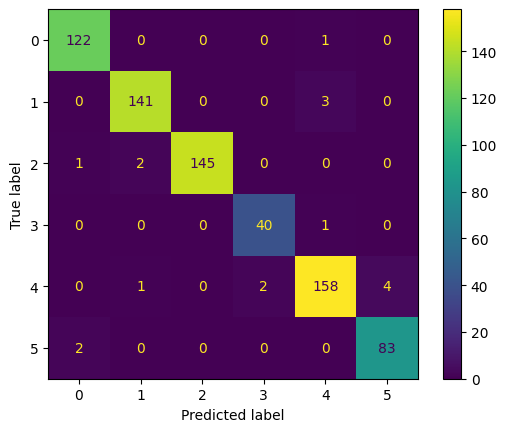

In [121]:
ConfusionMatrixDisplay.from_predictions(y_pred=y_pred,y_true=y_test)

In [122]:
print(classification_report(y_pred=y_pred,y_true=y_test))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98       123
           1       0.98      0.98      0.98       144
           2       1.00      0.98      0.99       148
           3       0.95      0.98      0.96        41
           4       0.97      0.96      0.96       165
           5       0.95      0.98      0.97        85

    accuracy                           0.98       706
   macro avg       0.97      0.98      0.97       706
weighted avg       0.98      0.98      0.98       706



Aqui lo que vamos a hacer es generar el modelo elegido de forma manual es decir pasando los hiperparametros que hemos determinado que son los más optimos para nuestro objetivo.

In [123]:
modelo_5 = MLPClassifier(
                hidden_layer_sizes=(50,),
                learning_rate_init=0.001,
                solver = 'lbfgs',
                max_iter = 1000,
                random_state = 123
            )

# Fit the classifier using the training set
modelo_5.fit(X_train, y_train)

y_pred_modelo_5 = modelo_5.predict(X_test)
# Evaluate the classifier using the test set
acc = accuracy_score(y_true=y_test,y_pred=y_pred_modelo_5)
print(acc)


0.9759206798866855


Para que nuestra read sea más informativa buscamos una manera de evaluar que componentes son los que más influencia tienen en nuestro clasificador. Lo que hacemos es tomar los pesos de la capa de entrada (primer capa) se encuentran en nuestro modelo. Se toma el valor absoluto de estos pesos para evitar que los pesos negativos cancelen a los positivos en el cálculo de la importancia.

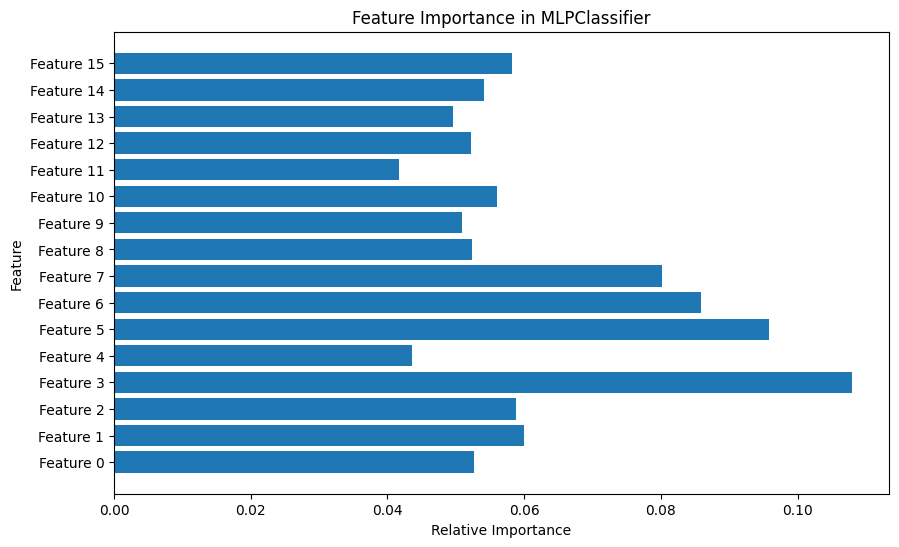

In [124]:
input_layer_weights = np.abs(modelo_5.coefs_[0])
input_layer_weights_normalized = input_layer_weights / np.sum(input_layer_weights, axis=0)

# Plot feature importance based on input layer weights
plt.figure(figsize=(10, 6))
plt.barh(range(X.shape[1]), input_layer_weights_normalized.mean(axis=1), align='center')
plt.yticks(range(X.shape[1]), ['Feature {}'.format(i) for i in range(X.shape[1])])
plt.xlabel('Relative Importance')
plt.ylabel('Feature')
plt.title('Feature Importance in MLPClassifier')
plt.show()

Podemos ver que los parametros que mas peso tienen en la capa de entrada de nuestra red son, el porcentaje de tiros libres, y luego el número de partidos jugados, el número de partidos como titular y los minutos jugados. Resultados similares a los obtenidos con el Arbol de Clasificación.

In [125]:
pd.DataFrame(X.columns)

0
0        3P%
1        2P%
2       eFG%
3        FT%
4   Age_scal
5     G_scal
6    GS_scal
7    MP_scal
8   ORB_scal
9   DRB_scal
10  AST_scal
11  STL_scal
12  BLK_scal
13  TOV_scal
14   PF_scal
15  PTS_scal

Guardamos y cargamos un modelo generado con la libreria sklearn

In [126]:
import pickle
with open('red_neuronal_mplclasificador.pkl', 'wb') as f:
    pickle.dump(modelo_5, f)


In [127]:

# Cargar el modelo desde el archivo
with open('red_neuronal_mplclasificador.pkl', 'rb') as f:
    loaded_model = pickle.load(f)


In [128]:

# Utilizar el modelo cargado para hacer predicciones
predictions = loaded_model.predict(X_test)

Siguiendo lo visto en el curso, vamos a definir una tercera forma de red neuronal, pero en lugar de hacerlo con sklearn; la optimización de hiperparámetros en un modelo de red neuronal, la vamos a hacer con Keras Tuner.

En el param_grid vamos a definir 
- activation: Lista de funciones de activación que se probarán en las capas ocultas.
- neuronas_min, neuronas_max, neuronas_step: Define el rango y paso para el número de neuronas en las capas ocultas.
- learning_rate: Lista de tasas de aprendizaje que se probarán en el optimizador Adam.

En la función nn_model

Dentro de **nn_model**:

- **hp**: Objeto HyperParameters de Keras Tuner, que permite seleccionar valores para los hiperparámetros durante la búsqueda.
- **input_shape**: Forma de los datos de entrada. En este caso será (16,) porque tenemos 16 inputs 
- **num_classes**: Número de clases en la tarea de clasificación. En nuestro caso los 6 clusters

Detalles:

- Se define una capa oculta con una función de activación (hp_activation_l1) y número de unidades (**hp_units_l1**) seleccionados por la búsqueda de hiperparámetros.
- La capa de salida utiliza una activación **softmax** para clasificación multiclase.
- Se compila el modelo utilizando el optimizador Adam con una tasa de aprendizaje (**hp_learning_rate**) seleccionada por la búsqueda de hiperparámetros, usando la pérdida **sparse_categorical_crossentropy** y la métrica de precisión **accuracy**.

In [129]:
# Grid de parámetros.
param_grid = {
    'activation': ['sigmoid', 'relu', 'softmax'],
    'neuronas_min': 4,
    'neuronas_max': 8,
    'neuronas_step': 1,
    'learning_rate': [0.001, 0.0001]
}

# DEFINICIÓN DEL MODELO.
def nn_model(hp, input_shape, num_classes):
    # Crear modelo
    model = Sequential()

    # Capa oculta
    hp_activation_l1 = hp.Choice('activation_l1', values=param_grid['activation'])
    hp_units_l1 = hp.Int('units_l1', min_value=param_grid['neuronas_min'], max_value=param_grid['neuronas_max'], step=param_grid['neuronas_step'])
    model.add(Dense(units=hp_units_l1, input_shape=input_shape, kernel_initializer='normal', activation=hp_activation_l1))
   
    # Capa de salida para clasificación multiclase
    model.add(Dense(num_classes, kernel_initializer='normal', activation='softmax'))
    

    # Compilar modelo
    hp_learning_rate = hp.Choice('learning_rate', values=param_grid['learning_rate'])
    model.compile(optimizer=keras.optimizers.Adam(learning_rate=hp_learning_rate),
                  loss='sparse_categorical_crossentropy',  # Para clasificación multiclase
                  metrics=['accuracy'])  # Métrica de precisión para clasificación

    return model

Hacemos una llamada con la funcion keras tuner para que busque la mejor combinacion de datos para nuestros datos. Configuramos un sintonizador Hyperband para optimizar los hiperparámetros de una red neuronal definida por la función nn_model. El objetivo es maximizar la precisión en los datos de validación (val_accuracy). Hyperband ajusta los hiperparámetros del modelo a través de múltiples rondas de entrenamiento, reduciendo gradualmente el número de modelos considerados en función del rendimiento. Los resultados de la búsqueda se almacenarán en el directorio my_dir bajo el nombre de proyecto nn_model_hyperband

In [130]:


tuner = kt.Hyperband(
    hypermodel=lambda hp: nn_model(hp, input_shape=(16,), num_classes=6),
    objective='val_accuracy',  # Metrica a optimizar
    max_epochs=10*10,  # Máximo número de épocas para la búsqueda
    factor=3,  # Factor que determina cuántas veces se deberían considerar los modelos para el entrenamiento
    directory='my_dir',  # Directorio para guardar los resultados del sintonizador
    project_name='nn_model_hyperband'  # Nombre del proyecto del sintonizador
)

Reloading Tuner from my_dir/nn_model_hyperband/tuner0.json


Tenemos que hacer una pequeña manipulación de nuestros datos.

In [131]:

label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

In [132]:
y_train_encoded

array([0, 2, 3, ..., 4, 0, 2])

En el siguiente código vamos a establecer una condición de parada temprana por el cual detendremos el entrenamiento de la red si la perdida no mejora despues de 5 epocas consecutivas. Después llamamos a nuestro tuner para que busque la mejor configuración basada en nuestros datos de entrenamiento. Finalmente seleccionamos la mejor configuración de hiperparametros

In [133]:
#Condición de parada en caso de no mejorar tras cierto número de épocas
stop_early = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=5)
tuner.search(X_train, y_train_encoded, epochs=500, batch_size=16, validation_split=0.2, callbacks=[stop_early])
# Get the optimal hyperparameters
best_hps=tuner.get_best_hyperparameters(num_trials=1)[0]


In [134]:
print(best_hps)

Le indicamos al tuner que nos muestre el resumen de la mejor configuracion encontrada

In [135]:
tuner.search_space_summary()

Search space summary
Default search space size: 3
activation_l1 (Choice)
{'default': 'sigmoid', 'conditions': [], 'values': ['sigmoid', 'relu', 'softmax'], 'ordered': False}
units_l1 (Int)
{'default': None, 'conditions': [], 'min_value': 4, 'max_value': 8, 'step': 1, 'sampling': 'linear'}
learning_rate (Choice)
{'default': 0.001, 'conditions': [], 'values': [0.001, 0.0001], 'ordered': True}


In [136]:
tuner.results_summary()

Results summary
Results in my_dir/nn_model_hyperband
Showing 10 best trials
Objective(name="val_accuracy", direction="max")

Trial 0007 summary
Hyperparameters:
activation_l1: relu
units_l1: 5
learning_rate: 0.001
tuner/epochs: 2
tuner/initial_epoch: 0
tuner/bracket: 4
tuner/round: 0
Score: 0.6832151412963867

Trial 0005 summary
Hyperparameters:
activation_l1: relu
units_l1: 4
learning_rate: 0.0001
tuner/epochs: 2
tuner/initial_epoch: 0
tuner/bracket: 4
tuner/round: 0
Score: 0.3617021143436432

Trial 0015 summary
Hyperparameters:
activation_l1: relu
units_l1: 7
learning_rate: 0.001
tuner/epochs: 2
tuner/initial_epoch: 0
tuner/bracket: 4
tuner/round: 0
Score: 0.33806145191192627

Trial 0011 summary
Hyperparameters:
activation_l1: relu
units_l1: 4
learning_rate: 0.001
tuner/epochs: 2
tuner/initial_epoch: 0
tuner/bracket: 4
tuner/round: 0
Score: 0.2600472867488861

Trial 0017 summary
Hyperparameters:
activation_l1: relu
units_l1: 8
learning_rate: 0.0001
tuner/epochs: 2
tuner/initial_epoch

Aquí finalmente construimos nuestro modelo con los mejores hiperparametros

In [137]:
# Definición del modelo con los mejores hiperparámetros.
stop_early = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=10)
model = tuner.hypermodel.build(best_hps)
history = model.fit(X_train, y_train_encoded, epochs=500, batch_size=16, validation_split=0.2, callbacks=[stop_early])

Epoch 1/500
106/106 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.2664 - loss: 1.7797 - val_accuracy: 0.3310 - val_loss: 1.7256
Epoch 2/500
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 536us/step - accuracy: 0.2679 - loss: 1.7062 - val_accuracy: 0.2128 - val_loss: 1.6545
Epoch 3/500
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 533us/step - accuracy: 0.2237 - loss: 1.6390 - val_accuracy: 0.3972 - val_loss: 1.5759
Epoch 4/500
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 483us/step - accuracy: 0.4220 - loss: 1.5555 - val_accuracy: 0.5130 - val_loss: 1.4791
Epoch 5/500
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 541us/step - accuracy: 0.5253 - loss: 1.4567 - val_accuracy: 0.6028 - val_loss: 1.3753
Epoch 6/500
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 574us/step - accuracy: 0.6028 - loss: 1.3526 - val_accuracy: 0.6478 - val_loss: 1.2723
Epoch 7/500
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 720us/step - accuracy: 0.6449 - loss: 1.2501 - val_accuracy: 0.6832 - val_loss: 1.1751
Epoch 8/500
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 507us/step - accuracy: 0.6785 - loss: 1.1

In [138]:
print(model.summary())

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 5)              │            85 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 6)              │            36 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 365 (1.43 KB)

 Trainable params: 121 (484.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 244 (980.00 B)

None


Vamos a desglosar el modelo para intentar entenderlo mejor

**Capas del Modelo:**

- **Layer (type)**: Indica el tipo de capa y su nombre.
- **Output Shape**: Muestra la forma (shape) de la salida de cada capa.
- **Param #**: Indica el número de parámetros entrenables en cada capa.

**Capas Específicas:**

- **dense (Dense)**:
  - **Output Shape**: **(None, 5)**
    - **None** indica que el tamaño del lote puede variar, y **5** es el número de unidades en la capa densa.
  - **Param #**: **85**
    - Esto incluye los pesos y sesgos de la capa. Para una capa densa, el número de parámetros es calculado como **input_units * output_units + output_units**, donde **input_units** es el número de entradas a la capa y **output_units** es el número de salidas. Aquí, parece que la entrada tiene 16 unidades (**16 * 5 + 5 = 80 + 5 = 85**).

- **dense_1 (Dense)**:
  - **Output Shape**: **(None, 6)**
    - **None** indica que el tamaño del lote puede variar, y **6** es el número de unidades en esta capa densa.
  - **Param #**: **36**
    - Para esta capa, el número de parámetros es **5 * 6 + 6 = 30 + 6 = 36**, asumiendo que toma la salida de la capa anterior que tiene 5 unidades.

**Totales:**
- **Total params**: **365 (1.43 KB)**
  - Este es el total de parámetros del modelo, sumando todos los parámetros de cada capa.
- **Trainable params**: **121 (484.00 B)**
  - Estos son los parámetros que el modelo puede actualizar durante el entrenamiento.
- **Non-trainable params**: **0 (0.00 B)**
  - Estos son los parámetros que no se actualizarán durante el entrenamiento (no hay ninguno en este caso).
- **Optimizer params**: **244 (980.00 B)**
  - Estos son los parámetros del optimizador que se utilizan para actualizar los pesos del modelo. La cantidad de parámetros del optimizador puede incluir términos adicionales usados internamente por el algoritmo de optimización.

**Interpretación:**

- **Modelo Simple**: El modelo es bastante simple, con solo dos capas densas.
- **Tamaño y Complejidad**: La primera capa reduce la dimensionalidad de la entrada de 16 a 5, y la segunda capa tiene 6 unidades, posiblemente para hacer una predicción final.
- **Aplicación**: Dado el tamaño y la estructura del modelo, parece adecuado para un problema con una entrada de 16 características y una salida de 6 clases o unidades.






En el siguiente gráfico vemos lo siguiente

**Desglose de la Interpretación**

**Precisión (train_accuracy y val_accuracy):**

- Si **train_accuracy** y **val_accuracy** están cercanos a 1 a partir de la época 100, esto indica que el modelo está realizando predicciones correctas en casi todas las instancias tanto en el conjunto de entrenamiento como en el de validación.
- Una alta precisión en ambos conjuntos sugiere que el modelo ha aprendido bien las características importantes de los datos y está generalizando adecuadamente.

**Pérdida (train_loss y val_loss):**

- Si **train_loss** y **val_loss** están alrededor de 0.1, esto indica que la cantidad de error en las predicciones del modelo es baja.
- Una pérdida baja en ambos conjuntos sugiere que el modelo no está cometiendo muchos errores y está ajustando bien los datos.


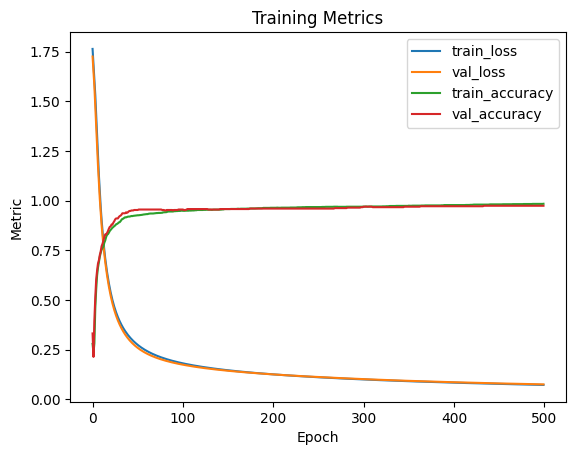

In [139]:
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')

# Graficar la precisión
plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')

plt.xlabel('Epoch')
plt.ylabel('Metric')
plt.title('Training Metrics')
plt.legend()
plt.show()


Generamos las predicciones sobre los datos de training y de test 

In [140]:
#PREDICCIÓN SOBRE TRAIN Y TEST
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)


67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 506us/step
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 300us/step


Vamos a guardar nuestro modelo para utilizarlo posteriormente si hiciera falta. Ahora utilizamos la liberia **tensorflow**

In [141]:
from tensorflow.keras.models import load_model
model.save('red_neuronal.h5')
modelo_importado = load_model('red_neuronal.h5')


Lo que hemos obtenido es la probabilidad de que la observacion pertenezca a cada una de las clases posibles, mediante el método argmax seleccionamos cual es la mayor probabilidad es decir la categoría mas probable

In [142]:
y_pred_test_cluster = np.argmax(y_pred_test, axis=1)
y_pred_train_cluster = np.argmax(y_pred_train, axis=1)
# y_pred_cluster ahora contendrá las etiquetas de cluster (índices de clase)
# para cada instancia en X_test basadas en las predicciones de tu modelo.



In [143]:

label_encoder = LabelEncoder()
y_pred_test_cluster_encoded = label_encoder.fit_transform(y_pred_test_cluster)
y_pred_train_cluster_encoded = label_encoder.fit_transform(y_pred_train_cluster)


Generamos la matriz de confusión para los datos de test y evaluamos la calidad de nuestro modelo.

In [144]:
print(classification_report(y_pred=y_pred_test_cluster_encoded,y_true=y_test_encoded))

              precision    recall  f1-score   support

           0       0.97      0.98      0.97       123
           1       0.97      0.93      0.95       144
           2       0.98      0.99      0.98       148
           3       1.00      0.88      0.94        41
           4       0.94      0.99      0.96       165
           5       0.95      0.95      0.95        85

    accuracy                           0.96       706
   macro avg       0.97      0.95      0.96       706
weighted avg       0.96      0.96      0.96       706



In [145]:
accuracy = accuracy_score(y_test_encoded, y_pred_test_cluster_encoded)
print("Precisión en el conjunto de prueba:", accuracy)

Precisión en el conjunto de prueba: 0.9631728045325779


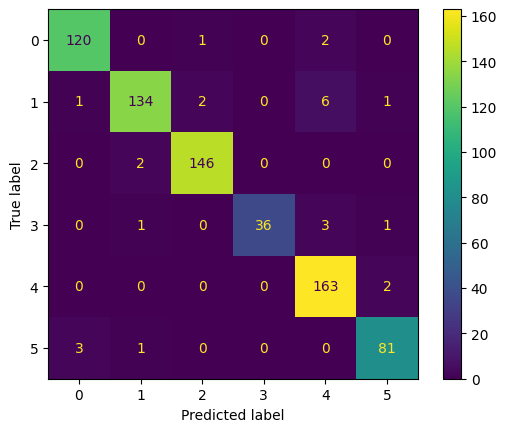

In [146]:
ConfusionMatrixDisplay.from_predictions(y_pred=y_pred_test_cluster_encoded,y_true=y_test_encoded)

Volvemos a evaluar que carácteristicas tienen mas importancia en nuestra red, basandonos en los pesos de las conexiones entre las neuronas de entrada y la primera capa oculta. Vemos la importancia en nuestra red del número de partidos jugados, el numero de titularidades, y luego con la misma importancia el número de minutos jugados, los rebotes ofensivos, los tapones y los puntos anotados.

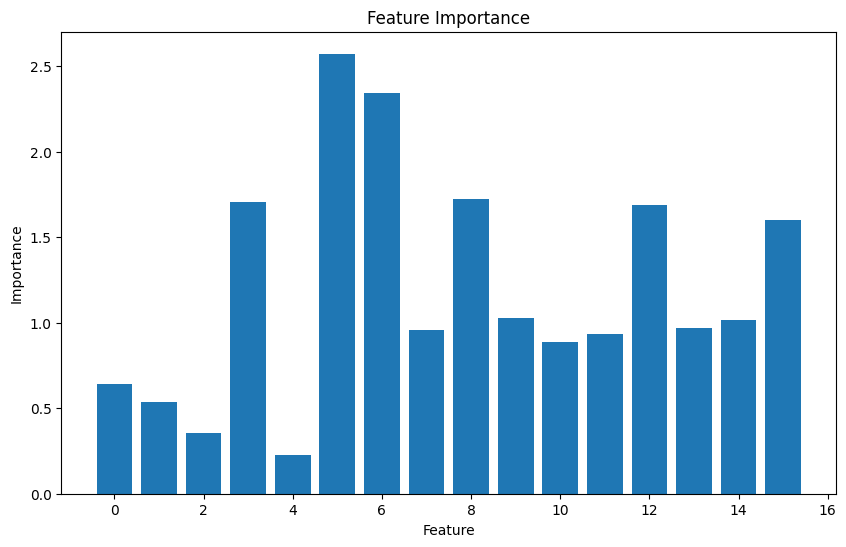

In [147]:
input_layer_weights = model.layers[0].get_weights()[0]
importance = np.abs(input_layer_weights)
feature_importance = np.mean(importance, axis=1)
plt.figure(figsize=(10, 6))
plt.bar(range(len(feature_importance)), feature_importance)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importance')
plt.show()

In [148]:
pd.DataFrame(X.columns)

0
0        3P%
1        2P%
2       eFG%
3        FT%
4   Age_scal
5     G_scal
6    GS_scal
7    MP_scal
8   ORB_scal
9   DRB_scal
10  AST_scal
11  STL_scal
12  BLK_scal
13  TOV_scal
14   PF_scal
15  PTS_scal

## Conclusiones

Hemos ajustado tres redes neuronales, una primera pasando unos parametros por azar con MLPClassifier de sklearn, una segunda haciendo una busqueda de hiperparametros de esta función, y una tercera usando keras tuner. Vemos que las tres proporcionan buenos resultados, con  una precisión superior al 95%. En el caso de que estuvieramos frente a un problema de clasificación binario podríamos utilizar la herramienta de las curvas roc y el AUC correspondiente para comparar el rendimiento de los modelos entre si. Al tratarse de un problema multiclase, podríamos generar curvas ROC tratando cada una de las clases como positiva frente al resto. En este caso serian seis problemas de clasificacion binaria. Esto escapa al objetivo del trabajo y por eso no se ha usado esta herramienta. Para comparar los modelos hemos usado el accuracy de los clasificadores en los datos de test. Basandonos en este criterio la mejor es la segunda aproximación mediante una busqueda de hiperparametros de la función MLPClassifier. Hemos obtenido una precisión del 97.59%.  Nuestra red con tiene una capa oculta de 50 neuronas, con una tasa de aprendizaje inicial de 0.001. 




Entre ambas estrategias, red neuronal y arbol de clasificación podemos ver que el primero es mucho más potente a la hora de clasificar a los jugadores de G-League en cuanto a su rendimiento. El árbol de clasificación tenía un accuracy del 83% frente a los valores superiores al 95% obtenidos con la red neuronal.



## Posibles mejoras

Como posible mejora, podría haber realizado un análisis balanceado de las clases. Aunque es una práctica común y útil para evitar sesgos en los modelos de aprendizaje automático, en este caso no lo consideré necesario debido a la distribución de los datos en mi conjunto de entrenamiento. Específicamente, la distribución del resultado en los diferentes clústeres de k-means fue la siguiente:

- Clúster 0: 549 instancias
- Clúster 1: 577 instancias
- Clúster 2: 569 instancias
- Clúster 3: 160 instancias
- Clúster 4: 641 instancias
- Clúster 5: 325 instancias

Dada esta distribución, las clases no estaban extremadamente desbalanceadas, lo que mitigó la necesidad inmediata de balancear las clases antes de proceder con el análisis y modelado.


## Tarea 3: 
Efectúa una predicción sobre los datos de la temporada 23-24 utilizando el clasificador de la tarea anterior. Selecciona alguno de los jugadores existentes y analiza si la clase asignada se ajusta al tipo de jugador del que se trata. Trata de buscar algún jugador que conozcas de antemano para poder explicar en términos generales el tipo de juego que realiza. Algunos jugadores que han participado en la G-League esta temporada han terminado jugando en Europa o son viejos conocidos del baloncesto del viejo continente.

In [149]:
df2324 = pd.read_csv('G-League_23-24.csv')
df2324

Player   Tm   Age   G  GS    MP   FG   FGA    FG%   3P  \
0           Abdullah Ahmed  WES  20.0  21   4  20.3  2.3   4.7  0.485  0.2   
1             James Akinjo  TOT   NaN  18   2  21.3  3.4   7.1  0.477  1.6   
2             James Akinjo  STO   NaN   4   0  21.3  2.5   7.3  0.345  1.3   
3             James Akinjo  WIS   NaN  14   2  21.3  3.6   7.1  0.515  1.7   
4          Warith Alatishe  TOT  24.0  27   6  18.1  2.9   4.1  0.703  0.1   
..                     ...  ...   ...  ..  ..   ...  ...   ...    ...  ...   
674            Isaiah Wong  IND  23.0  30  17  27.0  5.0  11.4  0.437  1.1   
675  Justin Wright-Foreman  MXC  26.0  12  10  29.3  7.1  15.8  0.447  2.2   
676                Kok Yat  IWA  20.0  26   3  13.0  1.8   4.2  0.422  1.0   
677              Gabe York  GLI  30.0  19  17  33.5  5.5  13.1  0.423  2.3   
678            Jacob Young  WCB  26.0  20   1  16.0  2.1   5.4  0.393  0.5   

     ...    FT%  ORB  DRB  TRB  AST  STL  BLK  TOV   PF   PTS  
0    ...  0.519  2.4  4.5  6.9  0.4  0.2  1.2  1.3  2.7   5.8  
1    ...  0.538  0.1  2.3  2.4  4.1  1.2  0.0  1.8  1.9   9.1  
2    ...  0.333  0.3  2.8  3.0  4.8  1.5  0.0  2.0  2.5   6.8  
3    ...  0.600  0.1  2.1  2.2  3.9  1.1  0.0  1.7  1.8   9.7  
4    ...  0.400  2.0  2.9  4.9  1.2  1.1  0.9  0.8  2.0   6.1  
..   ...    ...  ...  ...  ...  ...  ...  ...  ...  ...   ...  
674  ...  0.814  0.7  2.9  3.6  3.2  0.8  0.2  2.2  1.9  14.8  
675  ...  0.762  0.3  2.3  2.5  3.8  0.6  0.0  2.3  1.7  18.3  
676  ...  0.667  0.3  1.0  1.3  0.3  0.3  0.2  0.5  1.6   4.8  
677  ...  0.839  0.7  4.0  4.7  3.5  1.6  0.3  1.8  1.9  15.9  
678  ...  0.250  0.6  1.7  2.3  2.0  0.8  0.1  1.1  1.3   4.9  

[679 rows x 28 columns]

In [150]:
df2324['3P%']=df2324['3P%'].fillna(0, inplace=False)
df2324['2P%']=df2324['2P%'].fillna(0, inplace=False)
df2324['FT%']=df2324['FT%'].fillna(0, inplace=False)
df2324['Age']=df2324['Age'].fillna(df2324['Age'].mean(), inplace=False)
df2324[variablesCambiarTipo] = df2324[variablesCambiarTipo].apply(lambda x: x.astype('int'))
df2324 = df2324[df2324['eFG%'].notnull()]
df2324.isnull().sum()
scaler = MinMaxScaler()

for var in variablesNormalizar:
    new_column_name = var + '_scal'
    df2324[new_column_name] = scaler.fit_transform(df2324[[var]])

df2324.columns

Index(['Player', 'Tm', 'Age', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%', '3P', '3PA',
       '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB',
       'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'Age_scal', 'G_scal',
       'GS_scal', 'MP_scal', 'ORB_scal', 'DRB_scal', 'AST_scal', 'STL_scal',
       'BLK_scal', 'TOV_scal', 'PF_scal', 'PTS_scal'],
      dtype='object')

In [151]:
X_validation_nnet=df2324[input_columns]
X_validation_arbol=df2324[variablesClusterOriginales]


Como hemos visto hemos calculado 5 modelos, de los cuales para hacer la predicción voy a utilizar el arbol de clasificación y la mejor red neuronal obtenida (Modelos model_arbol y modelo_5 )



In [152]:
y_pred_validation_nnet = modelo_5.predict(X_validation_nnet)
y_pred_validation_arbol =  model_arbol.predict(X_validation_arbol)

## Estudio detallado de un jugador de la temporada 23-24.

Hemos elegido dos jugadores, uno de ellos Izan Almansa y el otro Jordan Bell

In [153]:
df2324['Cluster_nnet'] = y_pred_validation_nnet
df2324['Cluster_arbol'] = y_pred_validation_arbol
df2324
tabla_contingencia = pd.crosstab(df2324['Cluster_arbol'], df2324['Cluster_nnet'])
tabla_contingencia

Cluster_nnet    0   1   2   3    4   5
Cluster_arbol                         
0              81  12  31   2    1  14
1               1  81  38   0    0   5
2               0   0  92   0    0   1
3               1   4   0  56    3   3
4               8  42   0   1  107   4
5              15   5  18   1    1  44

Obtenemos un indicador estadístico de concordancia entre ambos clasificadores para evaluar si ambos están prediciendo de la misma forma nuestros clusters.

Como podemos observar se obtiene un índice de Kappa de Cohen de 0.62, que siguiendo la siguiente interpretación 

- **Menor que 0**: Indica una concordancia peor que la esperada por azar. Los valores negativos pueden indicar un acuerdo inverso o un acuerdo tan malo como el esperado al azar.
- **0 a 0.20:** Concordancia pobre.
- **0.21 a 0.40:** Concordancia justa.
- **0.41 a 0.60:** Concordancia moderada.
- **0.61 a 0.80:** Concordancia sustancial.
- **0.81 a 1:** Concordancia casi perfecta.

nos encontramos en una situación en la que hemos obtenido una concordancia mas que moderada de nuestros clasificadores

In [154]:

kappa = cohen_kappa_score(df2324['Cluster_arbol'], df2324['Cluster_nnet'])

# Imprimir el resultado
print("Coeficiente de Kappa de Cohen:", kappa)

Coeficiente de Kappa de Cohen: 0.6207380778520475


### Jordan Bell

Jordan Bell es un jugador de los Indiana Mad Ants que mide 2,03 metros de estatura y juega en la posición de ala-pívot. Nuestro modelo lo ha clasificado como cluster 5, que vamos a recordar como lo definiamos 

> **Cluster 5** Jugadores con muchas mas eficiencia en el tiro de 2, de hecho es el cluster con mayor media, que en el tiro de 3. Reboteadores natos, tanto ofensivamente como defensivamente, tanto el alto numero de tapones como el alto número de faltas personales, nos hace indicar que el perfil es de jugador que juega en posiciones interiores. Podría ser un claro ejemplo de pivots o ala-pivots

Se trata de un jugador que tiene un 22.7% de media en el tiro de 3 y un  70,4% en el tiro de 2, cogiendo un total de 7 rebotes por partido y casí 2.7 tapones, anotando una media de 12.2 puntos. Si nos fijamos en las caracteristicas generales del cluster 5, estos jugadores anotan una media de 14.10 puntos por partidos, con una media en el triple del 22.73% y en el tiro de 2 del 57.87%, cogiendo 1.30 rebotes por partidos. Es decir nuestro jugador esta promediando en valores similares a los de este cluster. En este video https://www.youtube.com/watch?v=8QCkf4tpCEs podemos ver una muestra del rendimiento del jugador en terminos de anotación, rebotes y tapones con valores que encajan en los parametros numéricos del cluster que hemos predicho.

In [155]:
df2324[df2324['Player']=='Jordan Bell'][['Cluster_nnet','Cluster_arbol']]

Cluster_nnet Cluster_arbol
44            5             5

Mostramos las medias de cada parametro en cada cluster para poder comparar con nuestro jugador 

In [156]:
means = datosJugadores.groupby('cluster_kmeans')[variablesClusterVisualizar].mean()

# Unir medias y desviaciones típicas en un solo DataFrame
result = pd.concat([means], axis=1, keys=['Media'])
result.round(decimals=3)


Media                                                      \
                   Age       G      GS      MP    FG%    3P%    2P%   eFG%   
cluster_kmeans                                                               
0               24.186  11.752   8.064  30.200  0.448  0.349  0.512  0.518   
1               24.631  34.133   8.442  20.692  0.452  0.308  0.509  0.516   
2               24.480  36.684  29.460  30.823  0.462  0.343  0.520  0.530   
3               24.525   4.894   0.362  12.169  0.368  0.192  0.435  0.419   
4               24.922  12.633   1.320  14.857  0.414  0.257  0.470  0.472   
5               23.695  16.591  11.588  27.085  0.533  0.227  0.579  0.560   

                                                                                
                  FT%    ORB    DRB    AST    STL    BLK    TOV     PF     PTS  
cluster_kmeans                                                                  
0               0.786  0.935  3.957  3.577  1.204  0.385  2.266  2.312  16.281  
1               0.724  1.008  2.723  1.571  0.701  0.403  1.148  1.927   8.316  
2               0.771  1.143  4.058  3.386  1.177  0.479  2.070  2.359  15.269  
3               0.061  0.530  1.524  0.859  0.399  0.170  0.699  1.243   3.358  
4               0.739  0.706  1.806  1.105  0.497  0.268  0.890  1.540   5.355  
5               0.671  2.676  5.728  1.816  0.804  1.304  1.992  2.818  14.104

In [157]:
df2324[df2324['Player']=='Jordan Bell'][variablesClusterVisualizar]


Age   G  GS    MP    FG%    3P%    2P%  eFG%    FT%  ORB  DRB  AST  STL  \
44   29  22  12  25.8  0.646  0.227  0.704  0.66  0.679  1.8  5.5  4.6  1.3   

    BLK  TOV   PF   PTS  
44  2.7  2.4  2.5  12.2

### Izan Almansa 

Es un jugador que pertenece a la plantilla del G League Ignite de la NBA G League. Con 2,08 metros de estatura juega en la posición de ala-pívot. Nuestros clasificadores lo han clasificado en el cluster 2. 

> **Cluster 2** Jugadores que juegan muchos partidos y aportan mucho minutos, destacan en el tiro de 2 y tiro de 3, jugadores finalizadores, son el segundo cluster en rebote ofensivo y defensivo, como en número de asistencias, robos y tambien perdidas. Seria un perfil similar al **cluster 0** pero aportando mucha mas veterania y experiencia. Serian jugadores titulares habituales en su equipo. 


En este caso el jugador elegido no encajaria exactamente en la descripción realizada, ya que es el primer año que juega en la G-League, pero es verdad que este año ha jugado 32 partidos, 30 de ellos titular, lo cual encaja en el perfil del cluster 2. Tiene una eFG de casi el 57%, siendo la media del cluster 2 del 53%. Da casí 1.2 asistencias por partido, unos valores ligeramente mas bajos que los de este cluster, cogiendo 4.5 rebotes defensivos, en los que la media de este cluster es de 4.05. Viendo estos resultados parece encajar bastante bien en el perfil del cluster y  podríamos decir que nuestros clasificadores han funcionado bastede forma óptima.


In [158]:
df2324[df2324['Player']=='Izan Almansa'][['Cluster_nnet','Cluster_arbol']]

Cluster_nnet Cluster_arbol
10            2             2

In [159]:
df2324[df2324['Player']=='Izan Almansa'][variablesClusterVisualizar]


Age   G  GS    MP   FG%  3P%    2P%   eFG%    FT%  ORB  DRB  AST  STL  \
10   18  32  30  27.6  0.56  0.2  0.598  0.569  0.614  2.7  4.5  1.2  0.7   

    BLK  TOV   PF   PTS  
10  0.4  0.9  1.7  11.7